In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
import xgboost

c:\users\jhkim6\pycharmprojects\gc\venv\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [4]:
from joblib import dump, load

In [5]:
import json

In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic'})
import sklearn

# 마이너스 부호 깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# row 출력제한 해제
pd.set_option('display.max_row', 500)

# column 출력제한 해제
pd.set_option('display.max_columns', 100)

In [8]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
from impyute.imputation.cs import mice, fast_knn

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from itertools import product
from scipy.stats import gaussian_kde
from scipy import stats

In [12]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [13]:
import torch 
from torch import nn,optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

# Data Load

In [14]:
with open('../input/DM_건강검진결과_토탈_피봇241014.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw = pd.DataFrame(js)

In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Columns: 136 entries, 검진년도 to 심장주위지방CT
dtypes: int64(4), object(132)
memory usage: 1.2+ GB


In [16]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Cortisol(스트레스호르몬)', '성장관련인자(IGF1)', 'Testosterone(테스토스테론)',
       '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)', 'NK세포활성도검사', 'P(인)',
       '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT'],
      dtype='object', length=136)

## config 설정

In [17]:
scaling_bool = True
# scaling_bool = False

In [18]:
sample_len = 2000

In [19]:
XGB_bool = False
pyTorch_bool = True

In [20]:
target_cols_direction = [True, True, True, True, True]

In [21]:
epochs = 500

## 연령대 제한

In [22]:
len(raw)

1227553

In [23]:
raw = raw[(raw['검진당시나이'] >= 20) & (raw['검진당시나이'] < 70)]
raw.reset_index(drop=True, inplace=True)

In [24]:
len(raw)

1213899

In [25]:
# df = raw.drop(['CU_INF_CONT', 'BRDT', 'ETL_REG_DTM', '검진완료일자',                           
#                # text
#                '심전도', '아질산염 (Nitrite)',
#                '갑상선초음파 (Thyroid Sono)', '위내시경 (Endo)', '상복부초음파 (Abdominal Sono)', '대장내시경',
#                '흉부X-선 (Chest PA)', '골밀도검사(BMD)', '경동맥초음파 (Carotid Sono)', '요추 CT', '뇌 CT', '동맥경화검사', '경추 CT',
#                '심장초음파 (Echocardio Sono)', '뇌MRI', '뇌MRA', '골밀도검사(허리)', '골밀도검사 (T-Score)', 
#                '위암혈액검사(Pepsinogen I)', 'Gastrin(가스트린)', 'Helicobactor pylori IgG(혈액)', 
#                'Helicobactor Pylori IgM(혈액)', '심장칼슘CT', '심장주위지방CT',
#               ], axis=1)

In [26]:
cols = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
#                '체중', '신장', '허리둘레', # 기본신체정보
                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)',
               ]

df = raw[cols]

In [27]:
df.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)
0,2010,7282,2520,1,42,20,21,63,22,165
1,2010,7490,3638,1,39,25,40,164,65,298
2,2010,7915,3997,1,36,19,17,184,66,241
3,2010,8056,4745,1,42,33,39,165,157,315
4,2010,8457,3929,1,38,28,18,147,27,350


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   검진년도           1213899 non-null  object
 1   UID            1213899 non-null  int64 
 2   CU_REC_ID      1213899 non-null  int64 
 3   SEX            1213899 non-null  int64 
 4   검진당시나이         1213899 non-null  int64 
 5   AST(SGOT)      1207648 non-null  object
 6   ALT(SGPT)      1205966 non-null  object
 7   ALP            1015782 non-null  object
 8   r-GTP(GGT)     1206247 non-null  object
 9   유산탈수소효소 (LDH)  858854 non-null   object
dtypes: int64(4), object(6)
memory usage: 92.6+ MB


In [29]:
df.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', 'AST(SGOT)', 'ALT(SGPT)',
       'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)'],
      dtype='object')

In [30]:
# df.columns = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '체중', '신장', '허리둘레', '체질량지수', 
#              '갑상선자극호르몬', 'Free T4'
#              ]

## nemeric으로 치환 못하는 수치들 결측치로 변환

In [31]:
numeric_col = df.columns

In [32]:
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   검진년도           1213899 non-null  int64  
 1   UID            1213899 non-null  int64  
 2   CU_REC_ID      1213899 non-null  int64  
 3   SEX            1213899 non-null  int64  
 4   검진당시나이         1213899 non-null  int64  
 5   AST(SGOT)      1206914 non-null  float64
 6   ALT(SGPT)      1204975 non-null  float64
 7   ALP            1014963 non-null  float64
 8   r-GTP(GGT)     1205357 non-null  float64
 9   유산탈수소효소 (LDH)  857893 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 92.6 MB


In [34]:
df.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.206914e+06,1.204975e+06,1.014963e+06,1.205357e+06,857893.000000
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,2.472999e+01,2.643380e+01,9.654561e+01,3.379699e+01,186.183242
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,1.786992e+01,2.441298e+01,6.404853e+01,4.106240e+01,69.182443
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,1.800000e+01,1.400000e+01,5.300000e+01,1.500000e+01,147.000000
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,2.100000e+01,2.000000e+01,6.800000e+01,2.200000e+01,165.000000
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,2.700000e+01,3.100000e+01,1.320000e+02,3.800000e+01,193.000000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,4.910000e+03,5.229000e+03,6.724000e+03,4.183000e+03,2961.000000


In [35]:
df_result = df.copy()

# 이상치 제거

In [36]:
len(df_result)

1213899

In [37]:
# IQR 기준 이상치 확인하는 함수
def findOutliers_column(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print('minimum :', minimum, 'maximum :', maximum)
    y = x[(x[column] > maximum) | (x[column] < minimum)]
#     y = x[(x[column] <= maximum) & (x[column] >= minimum)]
#     print(y.info())
#     print(y.index)
    return y, minimum, maximum

def findOutliers_column_out(x, column, minimum, maximum):
    y = x[(x[column] > maximum) | (x[column] < minimum)]
    return y
    
# IQR 기준 이상치 확인하는 함수
def findOutliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print(minimum)
    y = x[(x > maximum) | (x < minimum)]
#     return len(y)
    return y

## 이상치 컬럼 min, max 확인 및 drop

In [38]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [39]:
# IQR 기준 이상치 개수 확인
# target_cols = [
#                '검진당시나이', 
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)', #기본신체정보
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                ]
target_cols = temp

minimums = []
maximums = []

for col in target_cols:
    target_outlier, temp_min, temp_max = findOutliers_column(df_result, col)
    print(col, ':', len(df_result[col]),"/ IQR outliers: ", len(target_outlier), '/ ratio :', len(target_outlier)/len(df_result[col]))
    print()
    minimums.append(temp_min)
    maximums.append(temp_max)

for idx, col in enumerate(target_cols):    
    target_outlier = findOutliers_column_out(df_result, col, minimums[idx], maximums[idx])
    df_result = df_result.drop(target_outlier.index)
    df_result.reset_index(drop=True, inplace=True)

minimum : 4.5 maximum : 40.5
AST(SGOT) : 1213899 / IQR outliers:  81620 / ratio : 0.0672378838766652

minimum : -11.5 maximum : 56.5
ALT(SGPT) : 1213899 / IQR outliers:  81396 / ratio : 0.06705335452125753

minimum : -65.5 maximum : 250.5
ALP : 1213899 / IQR outliers:  27260 / ratio : 0.022456563519699744

minimum : -19.5 maximum : 72.5
r-GTP(GGT) : 1213899 / IQR outliers:  99079 / ratio : 0.08162046430551471

minimum : 78.0 maximum : 262.0
유산탈수소효소 (LDH) : 1213899 / IQR outliers:  110483 / ratio : 0.09101498559600099



In [40]:
target_cols

['AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [41]:
minimums

[4.5, -11.5, -65.5, -19.5, 78.0]

In [42]:
maximums

[40.5, 56.5, 250.5, 72.5, 262.0]

In [43]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936808 entries, 0 to 936807
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   검진년도           936808 non-null  int64  
 1   UID            936808 non-null  int64  
 2   CU_REC_ID      936808 non-null  int64  
 3   SEX            936808 non-null  int64  
 4   검진당시나이         936808 non-null  int64  
 5   AST(SGOT)      929865 non-null  float64
 6   ALT(SGPT)      928023 non-null  float64
 7   ALP            764337 non-null  float64
 8   r-GTP(GGT)     928387 non-null  float64
 9   유산탈수소효소 (LDH)  633457 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 71.5 MB


In [44]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)
0,2010,7282,2520,1,42,20.0,21.0,63.0,22.0,165.0
1,2010,7915,3997,1,36,19.0,17.0,184.0,66.0,241.0
2,2010,15783,1431,1,41,25.0,19.0,40.0,40.0,NaN
3,2010,15894,2533,2,29,21.0,13.0,104.0,15.0,NaN
4,2011,117186,8998,1,33,29.0,43.0,NaN,NaN,NaN


In [45]:
len(df_result)

936808

In [46]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936808 entries, 0 to 936807
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   검진년도           936808 non-null  int64  
 1   UID            936808 non-null  int64  
 2   CU_REC_ID      936808 non-null  int64  
 3   SEX            936808 non-null  int64  
 4   검진당시나이         936808 non-null  int64  
 5   AST(SGOT)      929865 non-null  float64
 6   ALT(SGPT)      928023 non-null  float64
 7   ALP            764337 non-null  float64
 8   r-GTP(GGT)     928387 non-null  float64
 9   유산탈수소효소 (LDH)  633457 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 71.5 MB


# target (건강지수) 계산

In [47]:
len(df_result)

936808

## Linear Regression coefficient 계산

In [48]:
def LR_coef(df):
    df_ = df.copy()
#     df_.reset_index(drop=True, inplace=True)
    df_.fillna(df_.mean().round(2), inplace=True)
    print(len(df_))
    
    df_temp = pd.DataFrame()

    for age in range(df_['검진당시나이'].min(), df_['검진당시나이'].max()):
        temp_ = df_[df_['검진당시나이'] == age].sample(n = sample_len, replace=True)
        df_temp = pd.concat([df_temp, temp_])
        
    X_train, X_test, y_train, y_test = train_test_split(df_temp[target_cols], df_temp['검진당시나이'], test_size=0.25, random_state=87)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('r2_score :',r2_score(y_test, y_pred))
    print('MAE :',mean_absolute_error(y_test, y_pred))
    print('model.coef_ :',model.coef_)
    print('model.intercept_ :',model.intercept_)
    
    df_['target_org'] = (model.coef_[0] * df_[target_cols[0]]) 
    + (model.coef_[1] * df_[target_cols[1]]) 
    + (model.coef_[2] * df_[target_cols[2]]) 
    + (model.coef_[3] * df_[target_cols[3]]) 
    + (model.coef_[4] * df_[target_cols[4]]) 
    + (model.coef_[5] * df_[target_cols[5]]) 
    + (model.coef_[6] * df_[target_cols[6]])
    + (model.coef_[7] * df_[target_cols[7]])
    
    df_['target'] = ((df_['target_org'] - df_['target_org'].min()) / (df_['target_org'].max() - df_['target_org'].min()))
        
    print('min :', df_['target_org'].min())
    print('max :', df_['target_org'].max())
    
    df_['target'] = (df_['target'] * 100) + 50
    
    df['target'] = df_['target']
    
    return df

In [49]:
# target_cols

In [50]:
# df_man = df_result[df_result['SEX'] == 1]
# df_man = LR_coef(df_man)

In [51]:
# df_man[df_man['target'].isna()]

In [52]:
# df_woman = df_result[df_result['SEX'] == 2]
# df_woman = LR_coef(df_woman)

In [53]:
# df_target = pd.concat([df_man, df_woman])

In [54]:
# len(df_target)

In [55]:
# df_target.dropna(subset=target_cols, how='all', inplace=True)
# df_target.reset_index(drop=True, inplace=True)

In [56]:
# len(df_target)

In [57]:
# df_target[df_target['target'].isna()]

In [58]:
# df_target.info()

In [59]:
# df_target.head()

In [60]:
# df_target['target'] = np.round(df_target['target'])
# df_target['target'] = df_target['target'].astype(int)

In [61]:
# len(df_target)

In [62]:
# df_target.describe()

In [63]:
# df_target[df_target['target'] == 50]

In [64]:
# df_target[df_target['target'] == 150]

## target (건강지수) 컬럼들간 mean으로 계산

In [65]:
# df_target = pd.DataFrame()

# for age in range(int(df_result['검진당시나이'].min()), int(df_result['검진당시나이'].max()) + 1):
# # for age in range(int(df_result['검진당시나이'].min()), 21):
    
#     df_cols = pd.DataFrame()
#     for col in target_cols:
#         df_temp = df_result[df_result['검진당시나이'] == age].copy()
#         df_temp['target_' + col] = ((df_temp[col] - df_temp[col].min()) / (df_temp[col].max() - df_temp[col].min()))
# #         print(age, df_temp[col].min(), df_temp[col].max(), df_temp[col].mean())
#         temp = df_temp['target_' + col].copy()
#         df_cols = pd.concat([df_cols, temp], axis=1)
    
#     df_cols['target'] = np.round(df_cols.mean(axis='columns') * 100) + 50
# #     df_target = pd.concat([df_target,pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols], axis=1)])
    
#     df_age = pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols['target']], axis=1)        
    
#     df_target = pd.concat([df_target, df_age])
    
# df_target.reset_index(drop=True, inplace=True)
# df_target.dropna(subset=['target'], inplace=True)
# df_target['target'] = df_target['target'].astype(int)

In [66]:
# len(df_target)

In [67]:
# df_target.head()

In [68]:
# df_target.info()

## gaussian_kde

In [69]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)
0,2010,7282,2520,1,42,20.0,21.0,63.0,22.0,165.0
1,2010,7915,3997,1,36,19.0,17.0,184.0,66.0,241.0
2,2010,15783,1431,1,41,25.0,19.0,40.0,40.0,NaN
3,2010,15894,2533,2,29,21.0,13.0,104.0,15.0,NaN
4,2011,117186,8998,1,33,29.0,43.0,NaN,NaN,NaN


In [70]:
target_cols

['AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [71]:
len(target_cols)

5

In [72]:
target_cols_direction

[True, True, True, True, True]

In [73]:
def kde_col(df, cols):
    
    threshold = 100
    
    df_target = pd.DataFrame() # return DF
    
    # 연령대별로 sample_len개 샘플링
    tmp_data = df.groupby(['SEX', '검진당시나이']).apply(
        lambda x: x.sample(sample_len, replace=True, random_state=42))

    tmp_data.reset_index(drop=True, inplace=True)    
    
    # 성연령별 모델 생성
    for sex, age in product([1, 2], range(df['검진당시나이'].min(), df['검진당시나이'].max() + 1)):
        tmp_data2 = tmp_data[tmp_data['SEX'] == sex]
        tmp_data2 = tmp_data2[tmp_data2['검진당시나이'] == age]
        
        df_temp = df[df['SEX'] == sex]
        df_temp = df_temp[df_temp['검진당시나이'] == age]
        df_temp.reset_index(drop=True, inplace=True)
            
        df_age = pd.DataFrame()
            
        for index, col in enumerate(cols):
#             print(col)
        
            input_data = tmp_data2[col].copy()
            input_data.fillna(input_data.mean().round(0), inplace=True)

            input_data = input_data.sort_values()

            # kde 모델
            kde = gaussian_kde(input_data)
            result = kde(input_data)
            max_value = result.max()            
            
            df_col = df_temp[col].copy()
            df_col.fillna(df_col.mean().round(0), inplace=True)
            
            # 방향성이 있을 경우
            max_idx = result.argmax()  # 최대값의 인덱스
            std_value = input_data.iloc[max_idx] # 인덱스 최대값의 밸류값

            arr = []

            temp = pd.DataFrame(kde(df_col), columns=['kde'])
            
            if target_cols_direction[index]:
                # center right
                temp['trigger'] = (df_col >= std_value)
            else:
                # center left
                temp['trigger'] = (df_col < std_value)
                
            temp['output'] = [(temp['kde'].iloc[idx] / max_value) * threshold if trigger else (1 + (1 - (temp['kde'].iloc[idx] / max_value))) * threshold
                              for idx, trigger in temp['trigger'].iteritems()]
                                
#             temp['gap'] = abs(temp['output'] - threshold)            
#             a = 11
#             temp['adjusted_gap'] = [np.log(temp['gap'].iloc[idx]) * a if gap> np.e else gap for idx, gap in temp['gap'].iteritems()]            
#             temp[col + '_kde'] = [threshold - temp['adjusted_gap'].iloc[idx] if trigger else threshold + temp['adjusted_gap'].iloc[idx] for idx, trigger in temp['trigger'].iteritems()]
            
            temp[col + '_kde'] = temp['output']
            temp[col + '_kde'] = temp[col + '_kde'].round(2)
            
            df_age = pd.concat([df_age, temp[col + '_kde']], axis=1)

        df_temp = pd.concat([df_temp, df_age], axis=1)
        df_target = pd.concat([df_target, df_temp])
        df_target.reset_index(drop=True, inplace=True)
    
    for col in target_cols:
        for idx in df_target[col][df_target[col].isnull()].index:        
            df_target.loc[idx, col + '_kde'] = threshold
            
    df_target['kde_mean'] = df_target.iloc[:, (5+len(cols)):(5+len(cols)+len(cols))].mean('columns').round(2)
    
#     for col in target_cols:
#         df_target.drop([col + '_kde'], axis = 1, inplace = True)
    
    df_target.sort_values(by='CU_REC_ID', inplace=True)
    
    return df_target

In [74]:
import time
start = time.time()
df_target = kde_col(df_result, target_cols)
end = time.time()
print(f"{end - start:.5f} sec")

811.47180 sec


In [75]:
df_target['kde_mean'].min()

1.31

In [76]:
df_target['kde_mean'].max()

199.11

## Target Scaling

In [77]:
df_target['target'] = ((df_target['kde_mean'] - df_target['kde_mean'].min()) / (df_target['kde_mean'].max() - df_target['kde_mean'].min()))

In [78]:
df_target['target'] = (df_target['target'] * 100) + 50

In [79]:
df_target['target'] = df_target['target'].round(0)

In [80]:
df_target['target'].value_counts().reset_index().sort_values('index')

,index,target
89,50.0,12
85,51.0,81
81,52.0,194
78,53.0,345
75,54.0,483
74,55.0,673
72,56.0,856
70,57.0,991
68,58.0,1273
66,59.0,1596


In [81]:
df_target['target'].min()

50.0

In [82]:
df_target['target'].max()

150.0

## Target 계산 결과

<AxesSubplot:xlabel='검진당시나이'>

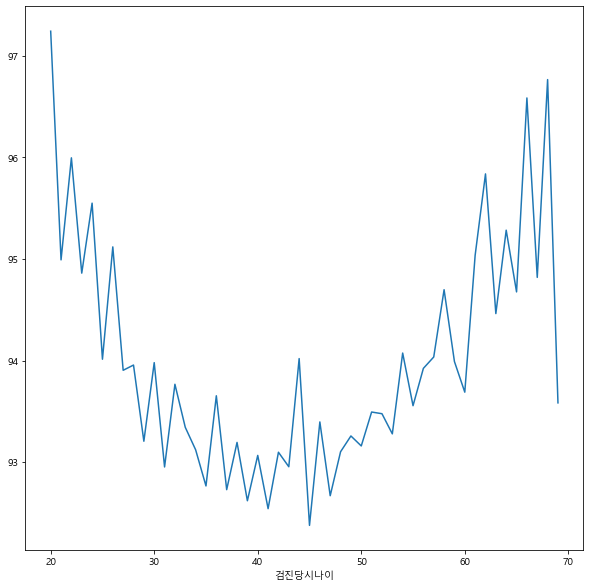

In [83]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').mean()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

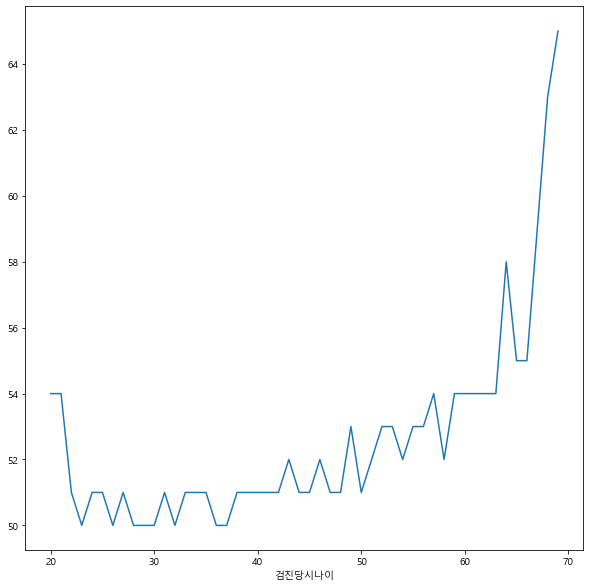

In [84]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').min()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

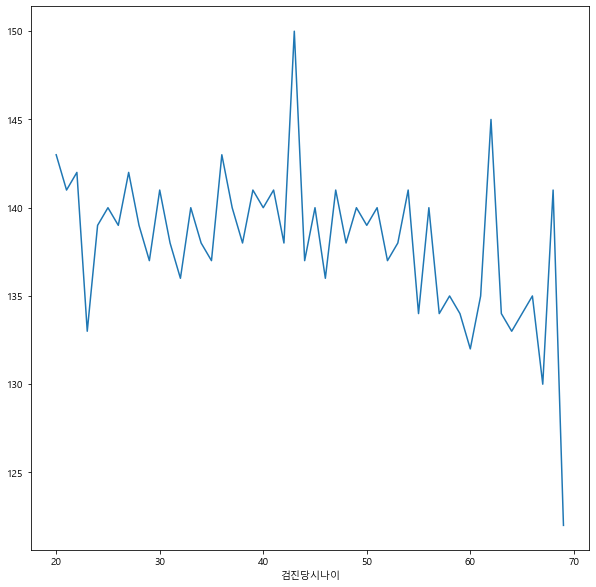

In [85]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').max()['target'].plot()

In [86]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
274436,2010,605512,253,1,42,22.0,17.0,40.0,14.0,233.0,94.86,100.71,153.32,140.76,1.18,98.17,99.0
274429,2010,439297,328,1,42,17.0,14.0,44.0,24.0,172.0,125.15,118.50,137.84,90.51,42.51,102.90,101.0
789089,2010,552037,332,2,41,16.0,10.0,46.0,8.0,170.0,112.83,119.18,102.30,158.48,28.19,104.20,102.0
64504,2010,171280,431,1,31,25.0,40.0,55.0,49.0,NaN,63.97,17.55,102.91,12.27,100.00,59.34,79.0
46634,2010,295306,436,1,30,27.0,47.0,50.0,47.0,NaN,41.05,10.47,117.71,13.53,100.00,56.55,78.0


# 결측행 제거

In [87]:
# df_result.dropna(axis=0).info()

In [88]:
# df_result.dropna(axis=0, inplace=True)

# 남성 모델

In [89]:
df_target['SEX'].value_counts()

1    544242
2    392566
Name: SEX, dtype: int64

In [90]:
df_man = df_target[df_target['SEX'] == 1]
len(df_man)

544242

In [91]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
274436,2010,605512,253,1,42,22.0,17.0,40.0,14.0,233.0,94.86,100.71,153.32,140.76,1.18,98.17,99.0
274429,2010,439297,328,1,42,17.0,14.0,44.0,24.0,172.0,125.15,118.50,137.84,90.51,42.51,102.90,101.0
64504,2010,171280,431,1,31,25.0,40.0,55.0,49.0,NaN,63.97,17.55,102.91,12.27,100.00,59.34,79.0
46634,2010,295306,436,1,30,27.0,47.0,50.0,47.0,NaN,41.05,10.47,117.71,13.53,100.00,56.55,78.0
33538,2010,209421,438,1,29,27.0,16.0,44.0,20.0,NaN,41.97,100.00,130.94,92.86,100.00,93.15,96.0


# 결측치 처리

## 결측치 삭제

In [92]:
# df_man.dropna(inplace=True)

In [93]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
274436,2010,605512,253,1,42,22.0,17.0,40.0,14.0,233.0,94.86,100.71,153.32,140.76,1.18,98.17,99.0
274429,2010,439297,328,1,42,17.0,14.0,44.0,24.0,172.0,125.15,118.50,137.84,90.51,42.51,102.90,101.0
64504,2010,171280,431,1,31,25.0,40.0,55.0,49.0,NaN,63.97,17.55,102.91,12.27,100.00,59.34,79.0
46634,2010,295306,436,1,30,27.0,47.0,50.0,47.0,NaN,41.05,10.47,117.71,13.53,100.00,56.55,78.0
33538,2010,209421,438,1,29,27.0,16.0,44.0,20.0,NaN,41.97,100.00,130.94,92.86,100.00,93.15,96.0


## 결측치 평균으로 대체

In [94]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [95]:
# 나이로 group by, 결측치를 평균으로 대체
# df_man = df_man.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [96]:
target_cols

['AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [97]:
len(df_man)

544242

In [98]:
df_man.dropna(subset=target_cols, how='all', inplace=True)

In [99]:
len(df_man)

540043

In [100]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
274436,2010,605512,253,1,42,22.0,17.0,40.0,14.0,233.0,94.86,100.71,153.32,140.76,1.18,98.17,99.0
274429,2010,439297,328,1,42,17.0,14.0,44.0,24.0,172.0,125.15,118.50,137.84,90.51,42.51,102.90,101.0
64504,2010,171280,431,1,31,25.0,40.0,55.0,49.0,NaN,63.97,17.55,102.91,12.27,100.00,59.34,79.0
46634,2010,295306,436,1,30,27.0,47.0,50.0,47.0,NaN,41.05,10.47,117.71,13.53,100.00,56.55,78.0
33538,2010,209421,438,1,29,27.0,16.0,44.0,20.0,NaN,41.97,100.00,130.94,92.86,100.00,93.15,96.0


## fillna

In [101]:
df_man.mean().round(2)

검진년도                    2021.98
UID                   523243.03
CU_REC_ID            1540744.04
SEX                        1.00
검진당시나이                    41.86
AST(SGOT)                 22.64
ALT(SGPT)                 24.53
ALP                       95.19
r-GTP(GGT)                29.36
유산탈수소효소 (LDH)            163.97
AST(SGOT)_kde             88.70
ALT(SGPT)_kde             82.27
ALP_kde                   82.46
r-GTP(GGT)_kde            77.98
유산탈수소효소 (LDH)_kde        102.49
kde_mean                  86.78
target                    93.21
dtype: float64

In [102]:
df_man.fillna(df_man.mean().round(2), inplace=True)

In [103]:
# df_man.fillna(0, inplace=True)

## IterativeImputer

In [104]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_target))
# df_impute.columns = df.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [105]:
# import time
# start = time.time()
# np_imputed = mice(df_man.values) # mice 학습시작
# df_man = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

# 스크리닝

## ALP 스크리닝

In [106]:
screening = 80

In [107]:
df_man[df_man['ALP'] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
274436,2010,605512,253,1,42,22.0,17.0,40.0,14.0,233.00,94.86,100.71,153.32,140.76,1.18,98.17,99.0
274429,2010,439297,328,1,42,17.0,14.0,44.0,24.0,172.00,125.15,118.50,137.84,90.51,42.51,102.90,101.0
64504,2010,171280,431,1,31,25.0,40.0,55.0,49.0,163.97,63.97,17.55,102.91,12.27,100.00,59.34,79.0
46634,2010,295306,436,1,30,27.0,47.0,50.0,47.0,163.97,41.05,10.47,117.71,13.53,100.00,56.55,78.0
33538,2010,209421,438,1,29,27.0,16.0,44.0,20.0,163.97,41.97,100.00,130.94,92.86,100.00,93.15,96.0


In [108]:
len(df_man[df_man['ALP'] < screening])

275780

In [109]:
df_man.loc[df_man['ALP'] < screening, 'ALP'] = screening

In [110]:
df_man[df_man['ALP'] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target


In [111]:
len(df_man[df_man['ALP'] < screening])

0

In [112]:
len(df_man)

540043

# 중복 제거

In [113]:
len(df_man)

540043

In [114]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_man.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [115]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
231829,2019,62,421626,1,40,24.0,37.0,168.00,25.0,156.00,74.71,28.77,17.42,89.94,159.59,74.09,87.0
256118,2020,62,565527,1,41,20.0,25.0,162.00,25.0,164.00,101.94,73.32,17.71,89.14,98.38,76.10,88.0
278269,2021,62,699357,1,42,22.0,27.0,152.00,27.0,152.00,94.86,77.58,15.17,80.71,166.81,87.03,93.0
300815,2022,62,1356310,1,43,18.0,20.0,80.00,20.0,151.00,112.79,99.79,100.86,100.50,155.90,113.97,107.0
323792,2023,62,2170394,1,44,25.0,37.0,80.00,22.0,149.00,84.12,38.43,100.14,99.52,172.64,98.97,99.0
485839,2022,67,1249745,1,54,28.0,33.0,95.19,41.0,185.00,51.30,42.32,100.00,42.18,19.78,51.12,75.0
455612,2022,76,1377275,1,52,19.0,20.0,80.00,21.0,163.97,106.68,99.62,103.28,100.18,100.00,101.95,101.0
455611,2022,76,1359161,1,52,19.0,20.0,80.00,21.0,163.97,106.68,99.62,103.28,100.18,100.00,101.95,101.0
13873,2021,77,621118,1,27,15.0,17.0,80.00,26.0,140.00,144.85,100.00,110.85,59.08,185.82,120.12,110.0
25274,2022,77,1047599,1,28,20.0,20.0,86.00,23.0,170.00,99.18,87.58,66.23,83.50,23.07,71.91,86.0


In [116]:
len(df_man)

540043

In [117]:
df_man[target_cols]

,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)
231829,24.0,37.0,168.00,25.0,156.00
256118,20.0,25.0,162.00,25.0,164.00
278269,22.0,27.0,152.00,27.0,152.00
300815,18.0,20.0,80.00,20.0,151.00
323792,25.0,37.0,80.00,22.0,149.00
...,...,...,...,...,...
42012,19.0,14.0,80.00,17.0,176.00
225191,21.0,31.0,95.19,28.0,163.97
9760,15.0,13.0,83.00,21.0,166.00
476803,15.0,11.0,80.00,12.0,118.00


## first만 남겨두고 중복 제거

In [118]:
df_man = df_man.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [119]:
len(df_man)

453645

In [120]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
231829,2019,62,421626,1,40,24.0,37.0,168.00,25.0,156.00,74.71,28.77,17.42,89.94,159.59,74.09,87.0
256118,2020,62,565527,1,41,20.0,25.0,162.00,25.0,164.00,101.94,73.32,17.71,89.14,98.38,76.10,88.0
278269,2021,62,699357,1,42,22.0,27.0,152.00,27.0,152.00,94.86,77.58,15.17,80.71,166.81,87.03,93.0
300815,2022,62,1356310,1,43,18.0,20.0,80.00,20.0,151.00,112.79,99.79,100.86,100.50,155.90,113.97,107.0
323792,2023,62,2170394,1,44,25.0,37.0,80.00,22.0,149.00,84.12,38.43,100.14,99.52,172.64,98.97,99.0
485839,2022,67,1249745,1,54,28.0,33.0,95.19,41.0,185.00,51.30,42.32,100.00,42.18,19.78,51.12,75.0
455612,2022,76,1377275,1,52,19.0,20.0,80.00,21.0,163.97,106.68,99.62,103.28,100.18,100.00,101.95,101.0
13873,2021,77,621118,1,27,15.0,17.0,80.00,26.0,140.00,144.85,100.00,110.85,59.08,185.82,120.12,110.0
25274,2022,77,1047599,1,28,20.0,20.0,86.00,23.0,170.00,99.18,87.58,66.23,83.50,23.07,71.91,86.0
40859,2023,77,1739126,1,29,19.0,23.0,95.00,22.0,142.00,100.02,77.70,88.79,82.22,182.31,106.21,103.0


In [121]:
df_man.reset_index(drop=True, inplace=True)

In [122]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
0,2019,62,421626,1,40,24.0,37.0,168.0,25.0,156.0,74.71,28.77,17.42,89.94,159.59,74.09,87.0
1,2020,62,565527,1,41,20.0,25.0,162.0,25.0,164.0,101.94,73.32,17.71,89.14,98.38,76.10,88.0
2,2021,62,699357,1,42,22.0,27.0,152.0,27.0,152.0,94.86,77.58,15.17,80.71,166.81,87.03,93.0
3,2022,62,1356310,1,43,18.0,20.0,80.0,20.0,151.0,112.79,99.79,100.86,100.50,155.90,113.97,107.0
4,2023,62,2170394,1,44,25.0,37.0,80.0,22.0,149.0,84.12,38.43,100.14,99.52,172.64,98.97,99.0


In [123]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453645 entries, 0 to 453644
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   검진년도               453645 non-null  int64  
 1   UID                453645 non-null  int64  
 2   CU_REC_ID          453645 non-null  int64  
 3   SEX                453645 non-null  int64  
 4   검진당시나이             453645 non-null  int64  
 5   AST(SGOT)          453645 non-null  float64
 6   ALT(SGPT)          453645 non-null  float64
 7   ALP                453645 non-null  float64
 8   r-GTP(GGT)         453645 non-null  float64
 9   유산탈수소효소 (LDH)      453645 non-null  float64
 10  AST(SGOT)_kde      453645 non-null  float64
 11  ALT(SGPT)_kde      453645 non-null  float64
 12  ALP_kde            453645 non-null  float64
 13  r-GTP(GGT)_kde     453645 non-null  float64
 14  유산탈수소효소 (LDH)_kde  453645 non-null  float64
 15  kde_mean           453645 non-null  float64
 16  ta

# 데이터 Sampling

In [124]:
len(df_man)

453645

In [125]:
df_man['target'].min()

52.0

In [126]:
df_man['target'].max()

150.0

## 150보다 큰 data 삭제

In [127]:
# df_man.drop(df_man[df_man['target'] > 150].index, inplace=True)

## 50보다 작은 data 삭제

In [128]:
# df_man.drop(df_man[df_man['target'] < 50].index, inplace=True)

In [129]:
len(df_man)

453645

In [130]:
# df_man_sample = pd.DataFrame()

# for age in range(int(df_man['target'].min()), 100):
#     print(age, 200 - age)
#     print(len(df_man[df_man['target'] == age]), len(df_man[df_man['target'] == (200 - age)]))

# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

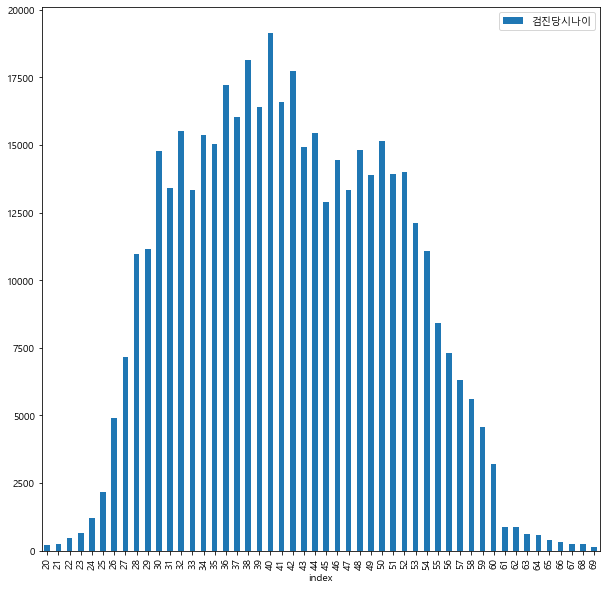

In [131]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [132]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
48,20,192
45,21,255
42,22,481
39,23,632
36,24,1193
35,25,2183
32,26,4888
29,27,7173
26,28,10985
24,29,11166


# 검진항목 시각화

In [133]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
count,453645.000000,4.536450e+05,4.536450e+05,453645.0,453645.000000,453645.000000,453645.000000,453645.000000,453645.000000,453645.000000,453645.000000,453645.000000,453645.000000,453645.000000,453645.000000,453645.000000,453645.000000
mean,2021.931740,5.198959e+05,1.540999e+06,1.0,41.797485,22.675795,24.592224,106.622077,29.398583,164.090293,88.416681,82.010370,81.678348,77.803407,102.263358,86.434433,93.035845
std,1.719918,3.700135e+05,8.027708e+05,0.0,9.006352,5.697480,10.146809,43.786089,13.970364,22.164623,40.213286,39.695388,41.567139,39.384915,59.140223,26.667500,13.485605
min,2010.000000,6.200000e+01,2.530000e+02,1.0,20.000000,5.000000,1.000000,80.000000,1.000000,78.000000,1.450000,1.180000,0.600000,0.240000,0.220000,4.960000,52.000000
25%,2021.000000,2.245220e+05,6.962630e+05,1.0,35.000000,19.000000,17.000000,80.000000,19.000000,153.000000,59.950000,51.250000,60.690000,44.700000,59.050000,67.920000,84.000000
50%,2022.000000,3.871940e+05,1.552173e+06,1.0,41.000000,22.000000,22.000000,80.000000,26.000000,163.970000,96.960000,91.110000,99.850000,85.720000,100.000000,87.140000,93.000000
75%,2023.000000,8.493090e+05,2.255574e+06,1.0,49.000000,26.000000,30.000000,97.000000,37.000000,170.000000,107.330000,101.940000,101.830000,101.040000,163.080000,104.770000,102.000000
max,2024.000000,1.473645e+06,2.871445e+06,1.0,69.000000,40.200000,56.500000,250.000000,72.500000,262.000000,200.000000,199.980000,199.940000,199.870000,200.000000,199.110000,150.000000


<AxesSubplot:xlabel='검진당시나이'>

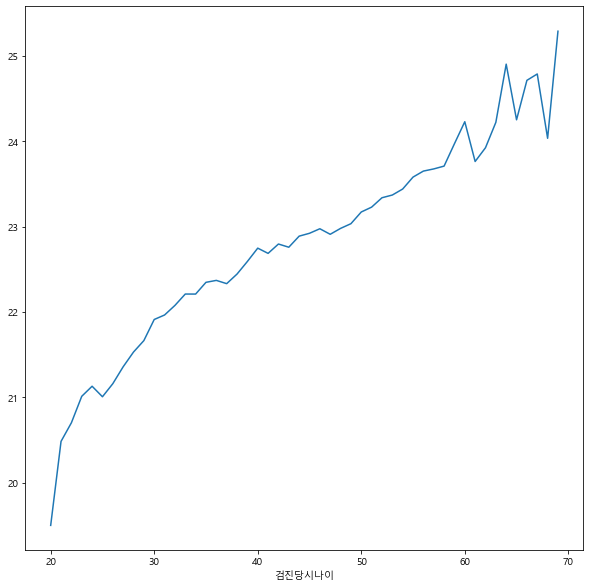

In [134]:
df_man.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

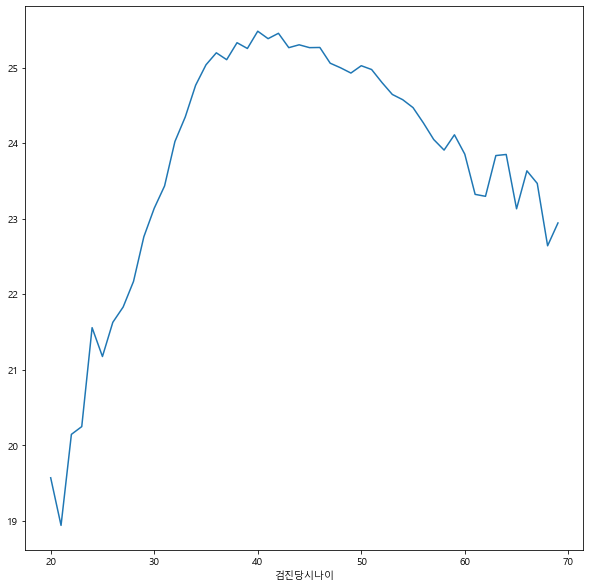

In [135]:
df_man.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

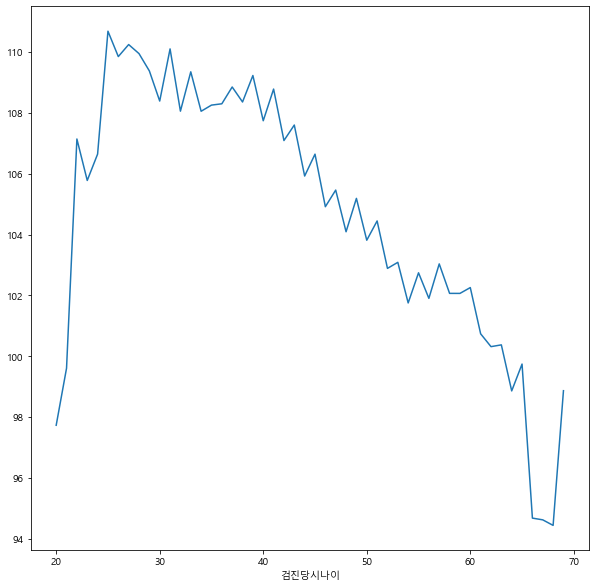

In [136]:
df_man.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

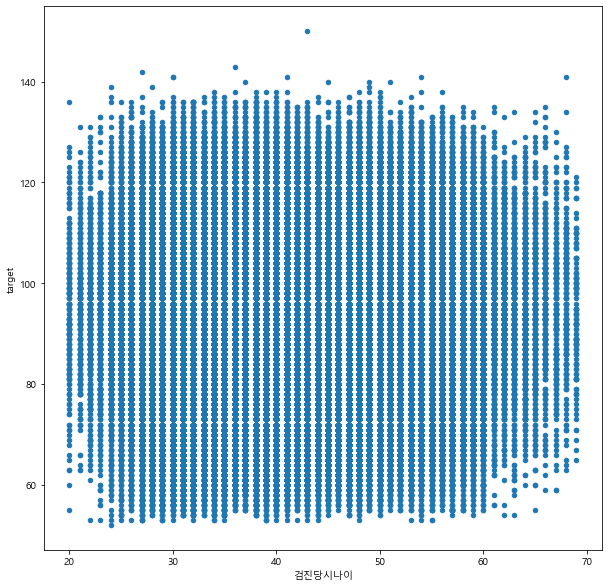

In [137]:
df_man.plot.scatter(x='검진당시나이', y='target')

<AxesSubplot:xlabel='index'>

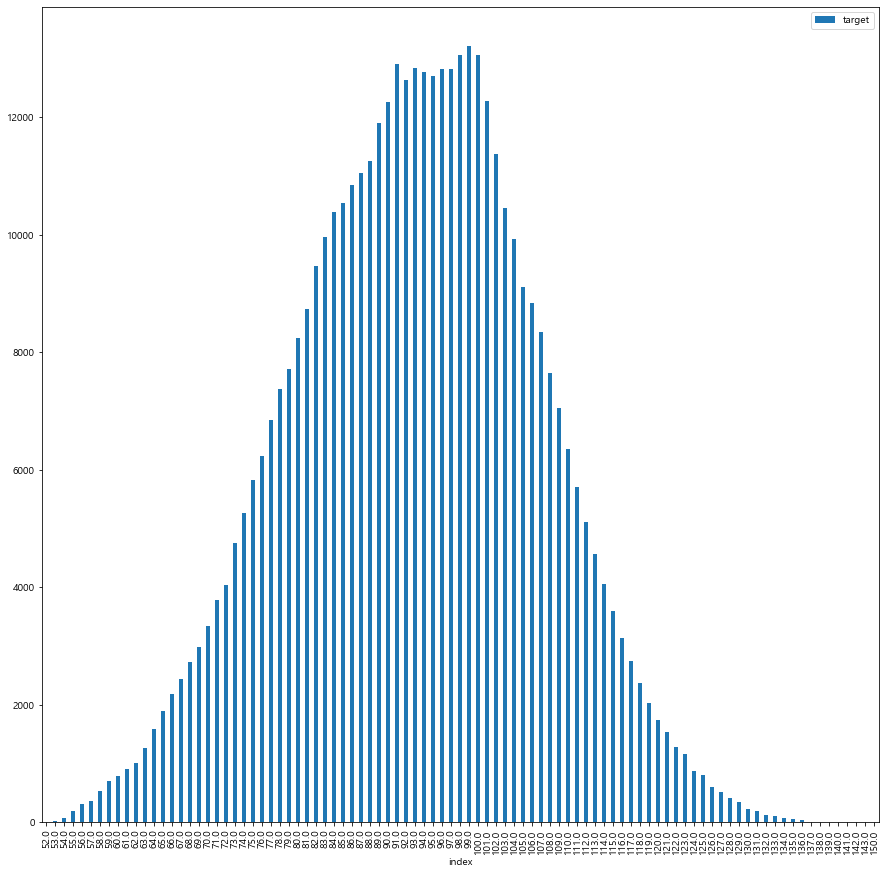

In [138]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [139]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
89,52.0,1
83,53.0,30
79,54.0,83
76,55.0,194
73,56.0,315
71,57.0,369
68,58.0,533
66,59.0,709
65,60.0,795
62,61.0,904


# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

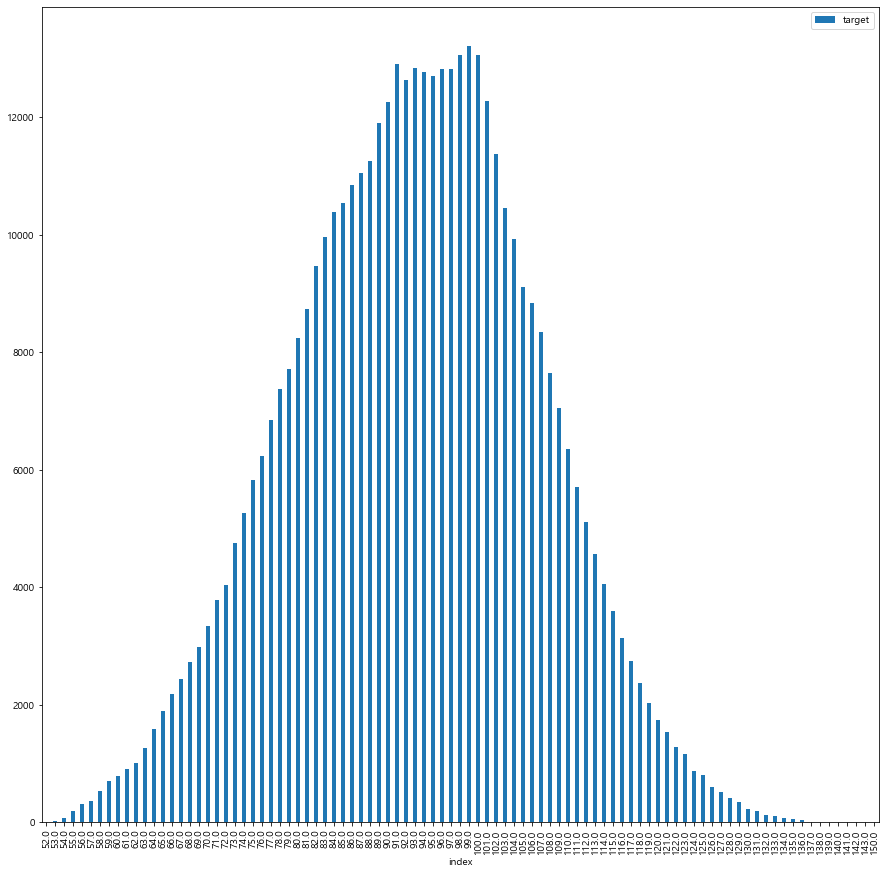

In [140]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [141]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
89,52.0,1
83,53.0,30
79,54.0,83
76,55.0,194
73,56.0,315
71,57.0,369
68,58.0,533
66,59.0,709
65,60.0,795
62,61.0,904


In [142]:
df_man_sampling = pd.DataFrame()

for target in range(int(df_man['target'].min()), 100):
#     print(target, 200 - target)
    left_len = len(df_man[df_man['target'] == target])
    right_len = len(df_man[df_man['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == 100]])                    

In [143]:
# df_man = df_man_sampling.copy()

<AxesSubplot:xlabel='index'>

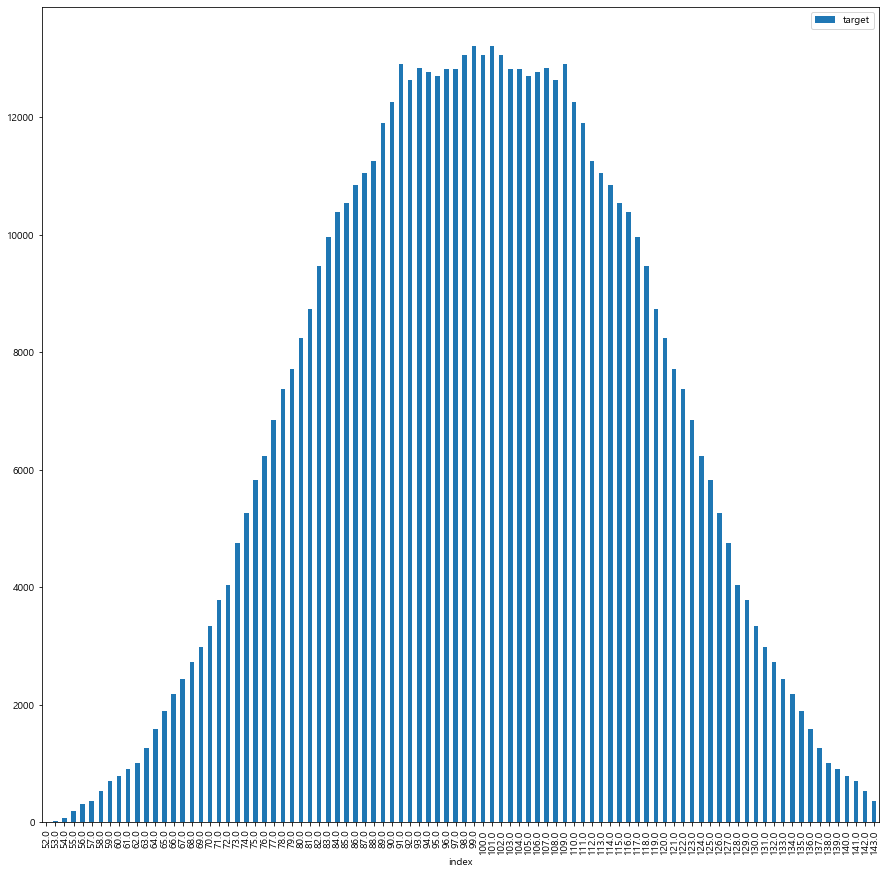

In [144]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [145]:
df_man_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
91,52.0,1
90,53.0,30
89,54.0,83
88,55.0,194
87,56.0,315
86,57.0,369
84,58.0,533
82,59.0,709
80,60.0,795
77,61.0,904


# 나이별 확인하기

In [146]:
target = 'target'

In [147]:
# df_man_sample = None
                 
# for idx in range(int(df_man[target].min()), int(df_man[target].max() + 1)):    
#     if len(df_man[df_man[target] == idx]) > 0:
#         temp_ = df_man[df_man[target] == idx].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#         df_man_sample = pd.concat([df_man_sample, temp_])

# df_man_sample.sample(frac=1).reset_index(drop=True, inplace=True)

In [148]:
# df_man = df_man_sample

In [149]:
# int(df_man['검진당시나이'].value_counts().mean())

In [150]:
# df_man['검진당시나이'].min()

In [151]:
# df_man['검진당시나이'].max()

In [152]:
# df_man.columns

In [153]:
# df_temp = None
# # sample_len = int(df_man['검진당시나이'].value_counts().mean())
# # sample_len = 1000
                 
# for age in range(df_man['검진당시나이'].min(), df_man['검진당시나이'].max()):
#     temp_ = df_man[df_man['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [154]:
# df_temp.info()

In [155]:
# df_temp.reset_index(drop=True, inplace=True)

In [156]:
# df_man = df_temp.copy()

In [157]:
# df_man['검진당시나이'].value_counts()

In [158]:
# df_man[df_man['검진당시나이']==38]

In [159]:
# df_man[df_man['검진당시나이']==38]['UID'].value_counts()

# model train

In [160]:
df_man.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', 'AST(SGOT)', 'ALT(SGPT)',
       'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', 'AST(SGOT)_kde', 'ALT(SGPT)_kde',
       'ALP_kde', 'r-GTP(GGT)_kde', '유산탈수소효소 (LDH)_kde', 'kde_mean', 'target'],
      dtype='object')

In [161]:
# train_columns = [
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)',
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                  ]

In [162]:
target_cols

['AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [163]:
train_columns = target_cols

In [164]:
target_col = 'target'

## Min Max Scaling

In [165]:
from sklearn.preprocessing import MinMaxScaler

In [166]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_man_sampling[train_columns])
    df_man_sampling_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)
    
    data_scaler2 = scaler.fit_transform(df_man[train_columns])
    df_man_scaled = pd.DataFrame(data=data_scaler2, columns=train_columns)

## train_test_split

In [167]:
if scaling_bool:
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling_scaled[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [168]:
# model = LinearRegression()

In [169]:
# model.fit(X_train, y_train)

In [170]:
# model.intercept_

In [171]:
# model.coef_

## Randomized SearchCV, 파라미터 튜닝

In [172]:
# model = XGBRegressor()

In [173]:
# # A parameter grid for XGBoost
# params = {
#     'n_estimators':[500],
# #     'min_child_weight':[4,5], 
# #     'gamma':[i/10.0 for i in range(3,6)],  
# #     'subsample':[i/10.0 for i in range(6,11)],
# #     'colsample_bytree':[i/10.0 for i in range(6,11)], 
# #     'max_depth': [2,3,4,6,7],
#     'objective': ['reg:squarederror', 'reg:tweedie'],
#     'booster': ['gbtree', 'gblinear'],
#     'eval_metric': ['rmse'],
#     'eta': [i/10.0 for i in range(3,6)],
# }

In [174]:
# # run randomized search
# n_iter_search = 10

# random_search = RandomizedSearchCV(model, param_distributions=params,
#                                    n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [175]:
# import time
# start = time.time()
# random_search.fit(X_train, y_train)
# print("RandomizedSearchCV took %.2f seconds for %d candidates"
#       " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

In [176]:
# # best parameter
# random_search.best_params_

In [177]:
# # best score
# random_search.best_score_

In [178]:
# model = random_search.best_estimator_
# model

## Keras

In [179]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [180]:
# model = build_model()

In [181]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [182]:
# model.summary()

In [183]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [184]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [185]:
# plot_history(history)

## pyTorch 신경망

In [186]:
np.shape(X_train)[1]

5

In [187]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(np.shape(X_train)[1], 512) #첫 번째 레이어 
        self.fc2 = nn.Linear(512, 128) #두 번째 레이어
        self.fc3 = nn.Linear(128, 16) #세 번째 레이어
        self.fc4 = nn.Linear(16, 1) #출력 레이어 
#         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
#         self.relu = nn.ReLU()
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) #활성화 함수 적용                 
#         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
        x = F.relu(self.fc2(x)) #활성화 함수 적용 
        x = F.relu(self.fc3(x))
#         x = F.relu(self.fc4(x))
        x = self.fc4(x)
#         x = self.fc1(x)
#         x = self.fc2(x)
#         x = self.fc3(x)
#         x = self.relu(x)
        return x

In [188]:
model = Regressor()
reg_loss = nn.MSELoss()
# reg_loss = nn.L1Loss()
# optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
optimizer = optim.Adam(model.parameters())
# optimizer = optim.SGD(model.parameters(), momentum=0.9)
# optimizer = optim.SGD(model.parameters())

In [189]:
# epochs = 5000

In [190]:
X_train  = torch.Tensor(X_train.to_numpy())
X_test  = torch.Tensor(X_test.to_numpy())
y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [191]:
import time
start = time.time()

losses = []

# 총 100번의 에포크 동안 모델 학습
for epoch in range(epochs):
    optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
    y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
    loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
    loss.backward()            # 역전파 연산으로 기울기 계산
    optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

    # 50번째 에포크마다 현재 에포크와 손실 값 출력
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

    # 손실 값을 리스트에 추가하여 추적
    losses.append(loss.item())

end = time.time()
print(f"{end - start:.5f} sec")

Epoch    0/500 Cost: 10230.716797
Epoch   10/500 Cost: 10078.059570
Epoch   20/500 Cost: 9741.566406
Epoch   30/500 Cost: 9060.797852
Epoch   40/500 Cost: 7822.096680
Epoch   50/500 Cost: 5854.030762
Epoch   60/500 Cost: 3347.634766
Epoch   70/500 Cost: 1433.393066
Epoch   80/500 Cost: 1224.192871
Epoch   90/500 Cost: 1081.646851
Epoch  100/500 Cost: 931.257141
Epoch  110/500 Cost: 856.319763
Epoch  120/500 Cost: 773.247498
Epoch  130/500 Cost: 706.411316
Epoch  140/500 Cost: 641.102295
Epoch  150/500 Cost: 580.188171
Epoch  160/500 Cost: 521.993835
Epoch  170/500 Cost: 466.688354
Epoch  180/500 Cost: 414.131897
Epoch  190/500 Cost: 364.517975
Epoch  200/500 Cost: 318.062103
Epoch  210/500 Cost: 275.118683
Epoch  220/500 Cost: 236.048477
Epoch  230/500 Cost: 201.076721
Epoch  240/500 Cost: 170.330856
Epoch  250/500 Cost: 143.845261
Epoch  260/500 Cost: 121.513535
Epoch  270/500 Cost: 103.072220
Epoch  280/500 Cost: 88.116570
Epoch  290/500 Cost: 76.137711
Epoch  300/500 Cost: 66.574623

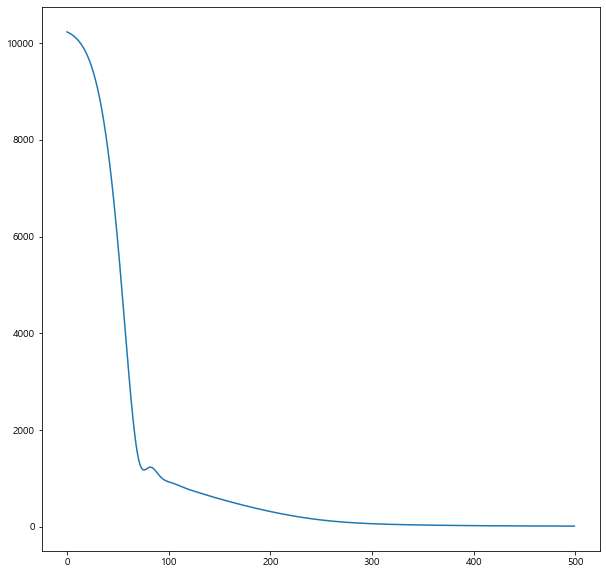

In [192]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(losses)

## coef 계산

In [193]:
# df_coef = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model.coef_).reset_index(drop=True)], axis=1)

In [194]:
# df_coef.columns = ['검사항목', 'coef']

In [195]:
# df_coef['coef'] = df_coef['coef'].round(4)

In [196]:
# df_coef['abs_coef'] = df_coef['coef'].abs()

In [197]:
# df_coef.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [198]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)

In [199]:
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)

In [200]:
# slr = LinearRegression()

In [201]:
# slr.fit(X_train_poly, y_train)

In [202]:
# np.shape(X_train)

In [203]:
# np.shape(X_train_poly)

In [204]:
# np.shape(X_test)

In [205]:
# np.shape(X_test_poly)

In [206]:
# y_pred_poly = slr.predict(X_test_poly)

In [207]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test, y_pred_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test, y_pred_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_poly)))

In [208]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred_poly)

# model save

In [209]:
# model_path = './model/03/11/20/best_estimator.pkl'

In [210]:
# import pickle
# with open(model_path,'wb') as f:
#     pickle.dump(model, f)

In [211]:
# with open(model_path, 'rb') as f:
#     model = pickle.load(f) 

In [212]:
# Get predictions
# y_pred = model.predict(X_test)

# 성능 평가

## pyTorch 예측

In [213]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model.eval()
        y_pred = model(X_test)
        y_pred = y_pred.numpy()

## XGBRegressor

In [214]:
if XGB_bool:
    y_pred = model.predict(X_test)

In [215]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test, y_pred))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test, y_pred))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 3.2810879
MSE : 17.199114
RMSE : 4.1471815


In [216]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9391818599201159

In [217]:
if XGB_bool:
    model.score(X_test, y_test)

## feature importance

In [218]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model)

# 실제지수 - 예측지수 결과

In [219]:
pd.DataFrame(y_test).reset_index(drop=True)

,0
0,77.0
1,88.0
2,90.0
3,100.0
4,63.0
...,...
155938,102.0
155939,113.0
155940,118.0
155941,124.0


In [220]:
pd.DataFrame(y_pred).reset_index(drop=True)

,0
0,78.645241
1,86.308876
2,96.576927
3,98.935196
4,74.852928
...,...
155938,102.765236
155939,113.851456
155940,123.033768
155941,124.799942


In [221]:
df_test = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_pred).reset_index(drop=True)], axis=1)

In [222]:
df_test.head()

,0,0
0,77.0,78.645241
1,88.0,86.308876
2,90.0,96.576927
3,100.0,98.935196
4,63.0,74.852928


In [223]:
df_test.columns

Int64Index([0, 0], dtype='int64')

In [224]:
df_test.columns = ['실제지수', '예측지수']

In [225]:
df_test['diff'] = df_test['예측지수'] - df_test['실제지수']

In [226]:
df_test.head()

,실제지수,예측지수,diff
0,77.0,78.645241,1.645241
1,88.0,86.308876,-1.691124
2,90.0,96.576927,6.576927
3,100.0,98.935196,-1.064804
4,63.0,74.852928,11.852928


In [227]:
df_test['diff_int'] = df_test['diff'].round(0)

In [228]:
len(df_test)

155943

In [229]:
df_test.head()

,실제지수,예측지수,diff,diff_int
0,77.0,78.645241,1.645241,2.0
1,88.0,86.308876,-1.691124,-2.0
2,90.0,96.576927,6.576927,7.0
3,100.0,98.935196,-1.064804,-1.0
4,63.0,74.852928,11.852928,12.0


<AxesSubplot:>

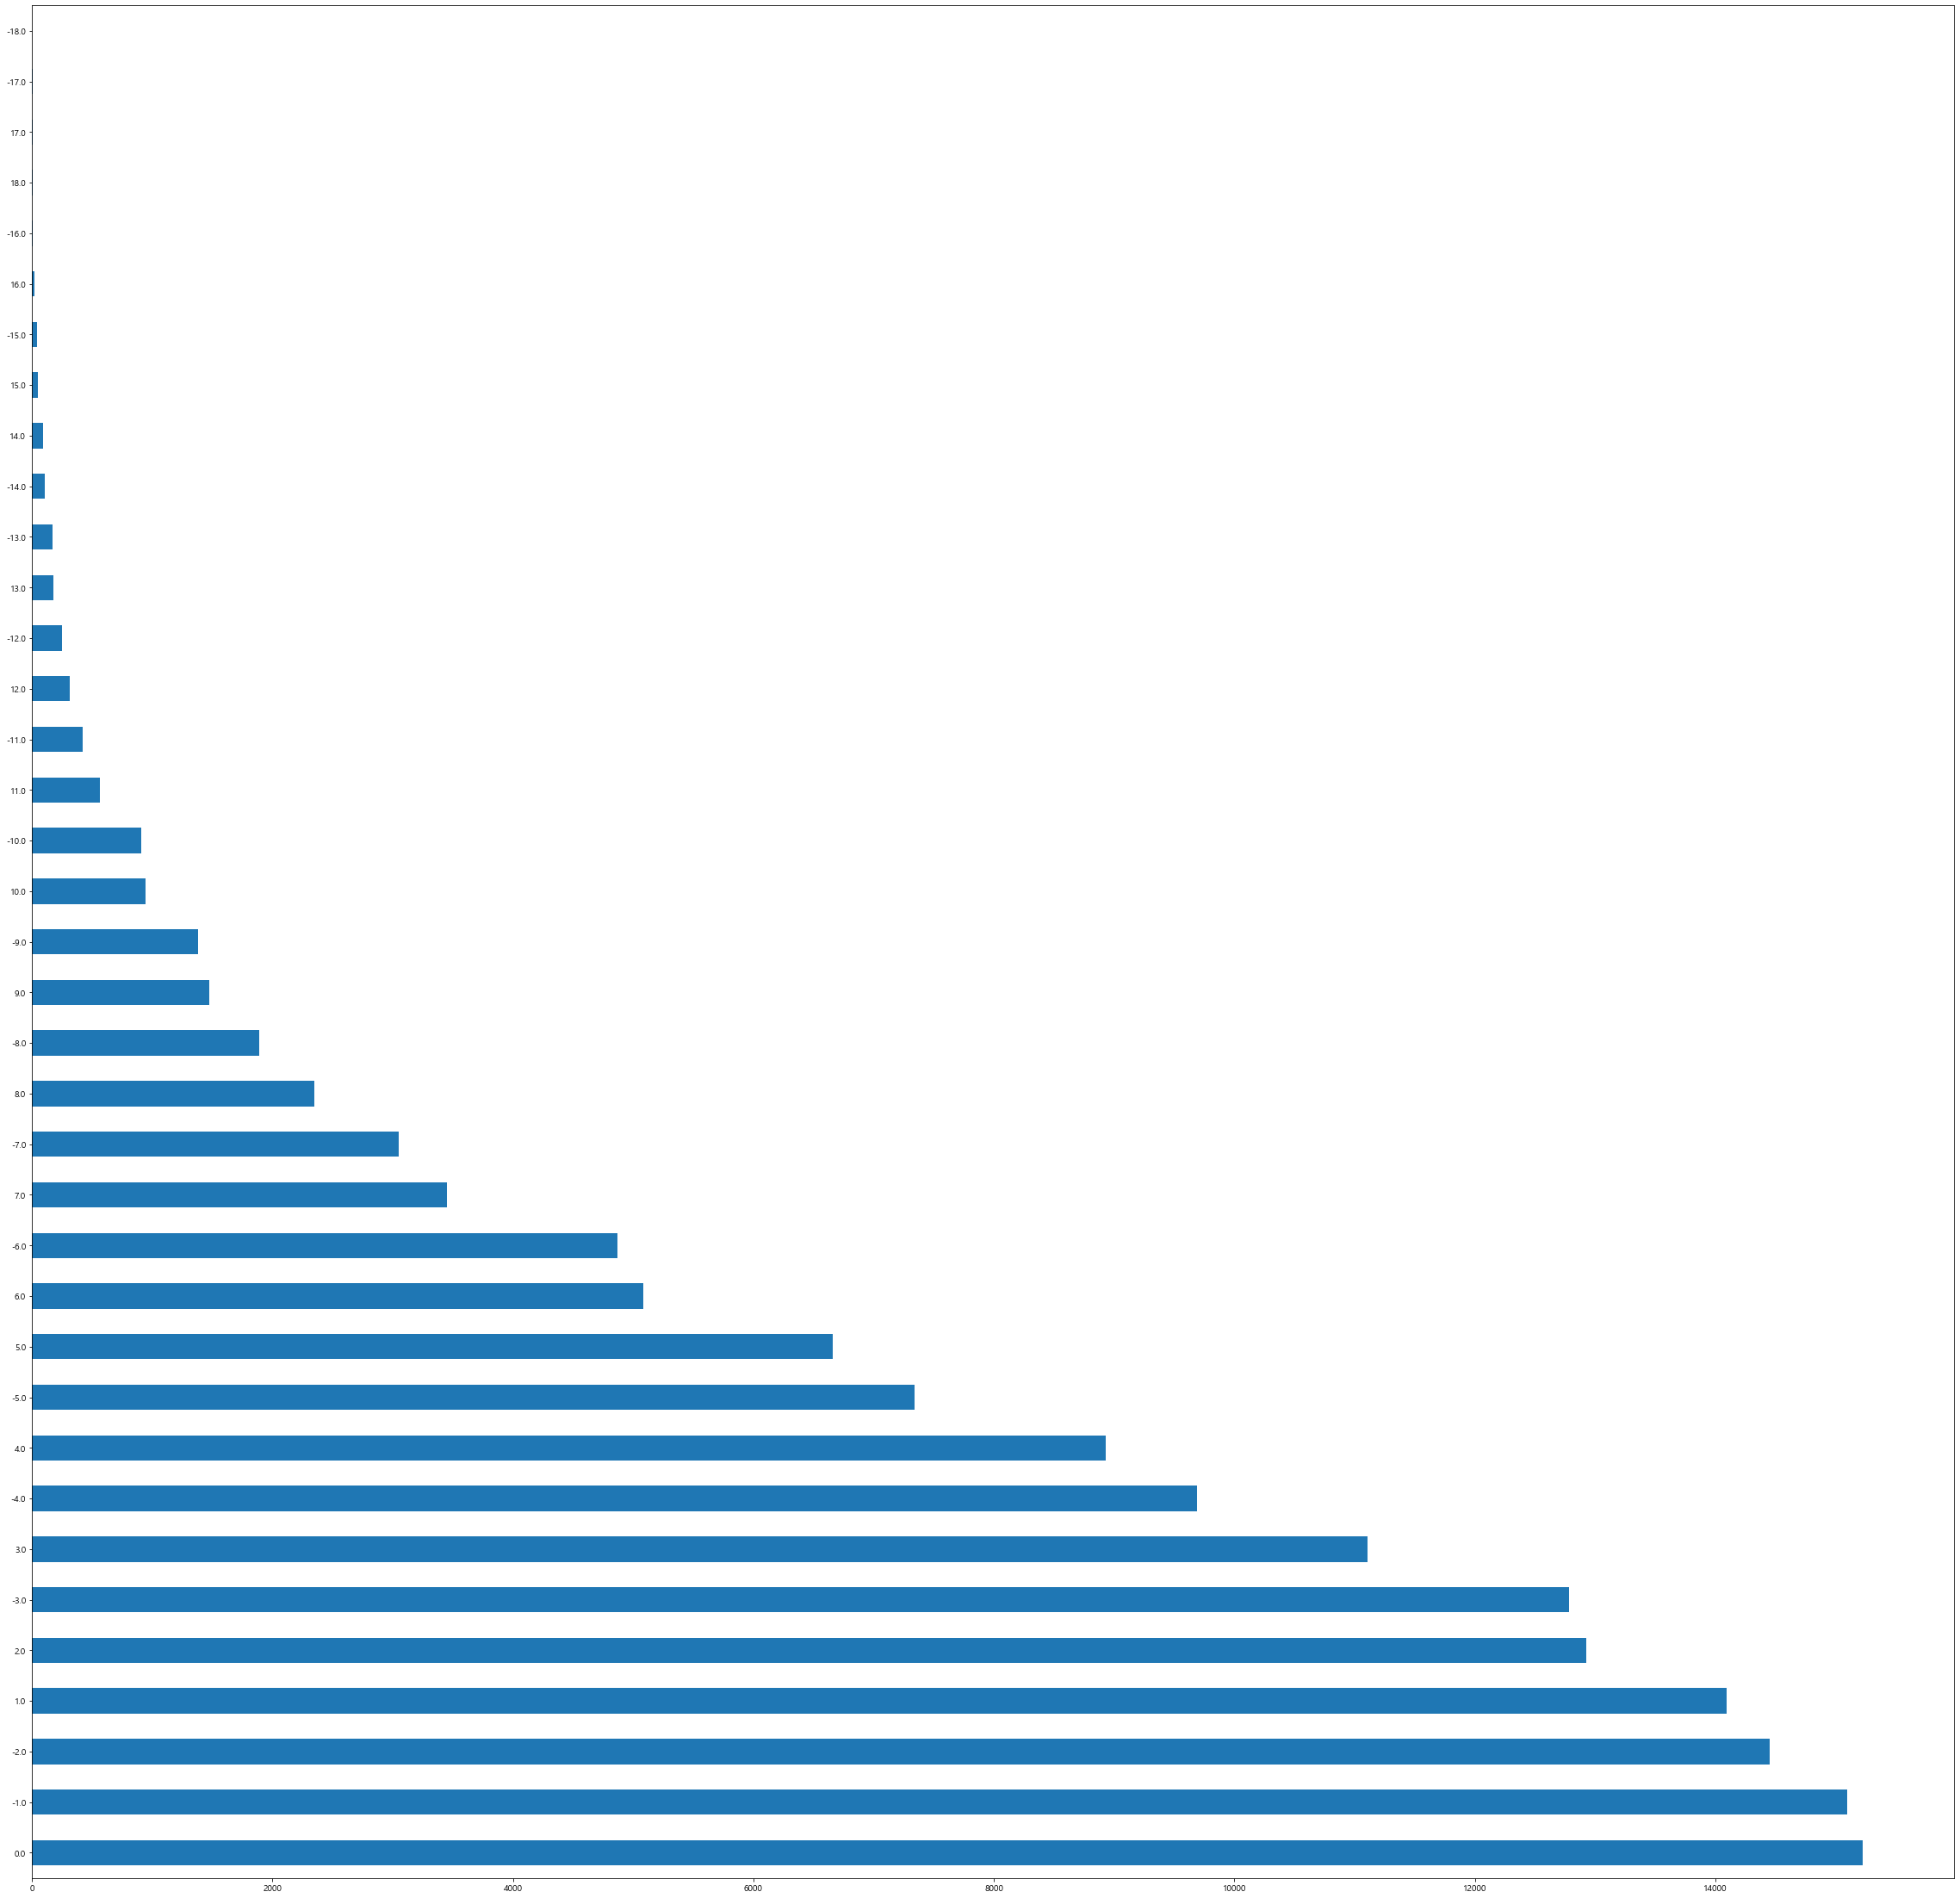

In [230]:
plt.figure(figsize=(40, 40))
df_test['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_남자.png')

In [231]:
df_test['diff_int'].value_counts(ascending=False)

 0.0     15226
-1.0     15100
-2.0     14456
 1.0     14095
 2.0     12929
-3.0     12786
 3.0     11108
-4.0      9689
 4.0      8931
-5.0      7340
 5.0      6659
 6.0      5086
-6.0      4867
 7.0      3451
-7.0      3049
 8.0      2351
-8.0      1888
 9.0      1472
-9.0      1379
 10.0      942
-10.0      909
 11.0      567
-11.0      419
 12.0      314
-12.0      250
 13.0      176
-13.0      173
-14.0      104
 14.0       89
 15.0       52
-15.0       42
 16.0       23
-16.0        9
 18.0        5
 17.0        3
-17.0        3
-18.0        1
Name: diff_int, dtype: int64

In [232]:
df_test['예측지수'].round(0).value_counts()

108.0    3288
110.0    3285
107.0    3282
113.0    3252
105.0    3249
111.0    3245
109.0    3208
112.0    3187
102.0    3182
104.0    3176
114.0    3165
98.0     3140
106.0    3126
116.0    3118
103.0    3088
94.0     3062
99.0     3056
92.0     3033
96.0     3017
97.0     2995
101.0    2989
115.0    2983
100.0    2979
91.0     2968
95.0     2940
86.0     2921
90.0     2913
93.0     2881
88.0     2873
117.0    2853
89.0     2847
87.0     2813
119.0    2810
85.0     2746
118.0    2739
84.0     2730
82.0     2687
83.0     2672
80.0     2505
81.0     2454
120.0    2364
121.0    2221
78.0     2171
79.0     2136
123.0    1982
122.0    1967
77.0     1924
124.0    1859
76.0     1800
75.0     1494
74.0     1439
125.0    1368
73.0     1249
126.0    1226
127.0    1215
72.0     1058
128.0     962
71.0      872
129.0     818
70.0      714
130.0     648
69.0      637
68.0      520
67.0      489
131.0     474
133.0     450
132.0     414
66.0      387
134.0     323
65.0      313
64.0      240
63.0  

# 예측 나이 분포

In [233]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_train_pred = model(X_train)
        X_train_pred = X_train_pred.numpy()

    df_train = pd.DataFrame(X_train_pred).reset_index(drop=True)
    y_test = pd.DataFrame(y_test.numpy())

In [234]:
if XGB_bool:
    df_train = pd.DataFrame(model.predict(X_train)).reset_index(drop=True)

In [235]:
df_train.round(0).value_counts()

107.0    9939
111.0    9797
110.0    9758
108.0    9722
109.0    9719
113.0    9618
114.0    9577
106.0    9576
104.0    9570
105.0    9522
112.0    9518
103.0    9479
102.0    9390
94.0     9186
98.0     9181
95.0     9127
101.0    9105
97.0     9020
116.0    9007
99.0     9003
96.0     8994
100.0    8991
93.0     8981
115.0    8954
91.0     8938
92.0     8930
90.0     8915
89.0     8770
88.0     8698
87.0     8540
117.0    8515
86.0     8345
84.0     8318
85.0     8215
119.0    8182
118.0    8097
83.0     8063
82.0     7953
81.0     7585
120.0    7288
80.0     7260
79.0     6759
121.0    6553
78.0     6409
77.0     5951
123.0    5926
122.0    5760
124.0    5310
76.0     5292
75.0     4799
74.0     4329
125.0    4125
126.0    3813
73.0     3790
127.0    3494
72.0     3092
128.0    2973
71.0     2605
129.0    2496
70.0     2112
130.0    2062
69.0     1819
68.0     1551
131.0    1460
133.0    1435
67.0     1385
132.0    1267
66.0     1137
134.0     983
65.0      933
64.0      663
63.0  

In [236]:
# df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [237]:
y_test.value_counts()

101.0    3375
91.0     3309
98.0     3302
97.0     3275
109.0    3253
100.0    3231
99.0     3230
103.0    3223
102.0    3204
107.0    3198
105.0    3194
93.0     3190
108.0    3181
92.0     3174
104.0    3173
96.0     3173
95.0     3168
94.0     3167
110.0    3112
106.0    3108
89.0     3031
111.0    2990
90.0     2981
112.0    2793
88.0     2793
113.0    2786
114.0    2730
87.0     2719
85.0     2709
115.0    2709
86.0     2703
116.0    2592
84.0     2580
117.0    2509
83.0     2416
82.0     2391
118.0    2309
81.0     2222
119.0    2183
120.0    2020
121.0    1994
80.0     1975
122.0    1895
79.0     1831
78.0     1808
77.0     1720
123.0    1691
76.0     1623
124.0    1547
125.0    1511
75.0     1480
126.0    1311
74.0     1284
127.0    1184
73.0     1182
128.0    1025
72.0      984
129.0     949
71.0      918
130.0     851
70.0      827
69.0      772
131.0     743
68.0      700
67.0      693
132.0     661
133.0     621
66.0      551
134.0     537
135.0     499
65.0      453
136.0 

In [238]:
df_plot = pd.DataFrame(y_test.value_counts())

In [239]:
df_plot.columns = ['count']

In [240]:
df_plot.reset_index(inplace=True)

In [241]:
df_plot = df_plot.sort_values(0, ascending=True)

In [242]:
df_plot.columns = ['index', 'count']

In [243]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

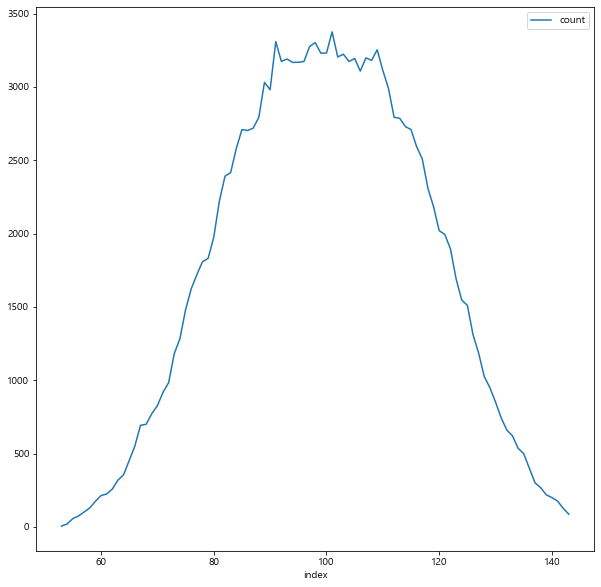

In [244]:
df_plot.plot()

In [245]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_test_pred = model(X_test)
        X_test_pred = X_test_pred.numpy()
    df_test = pd.DataFrame(X_test_pred).reset_index(drop=True)

In [246]:
if XGB_bool:
    df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [247]:
df_test.round(0).value_counts()

108.0    3288
110.0    3285
107.0    3282
113.0    3252
105.0    3249
111.0    3245
109.0    3208
112.0    3187
102.0    3182
104.0    3176
114.0    3165
98.0     3140
106.0    3126
116.0    3118
103.0    3088
94.0     3062
99.0     3056
92.0     3033
96.0     3017
97.0     2995
101.0    2989
115.0    2983
100.0    2979
91.0     2968
95.0     2940
86.0     2921
90.0     2913
93.0     2881
88.0     2873
117.0    2853
89.0     2847
87.0     2813
119.0    2810
85.0     2746
118.0    2739
84.0     2730
82.0     2687
83.0     2672
80.0     2505
81.0     2454
120.0    2364
121.0    2221
78.0     2171
79.0     2136
123.0    1982
122.0    1967
77.0     1924
124.0    1859
76.0     1800
75.0     1494
74.0     1439
125.0    1368
73.0     1249
126.0    1226
127.0    1215
72.0     1058
128.0     962
71.0      872
129.0     818
70.0      714
130.0     648
69.0      637
68.0      520
67.0      489
131.0     474
133.0     450
132.0     414
66.0      387
134.0     323
65.0      313
64.0      240
63.0  

In [248]:
df_plot = pd.DataFrame(df_test.round(0).value_counts())

In [249]:
df_plot.columns = ['count']

In [250]:
df_plot.reset_index(inplace=True)

In [251]:
df_plot = df_plot.sort_values(0, ascending=True)

In [252]:
df_plot.set_index(0, inplace=True)

In [253]:
df_plot

,count
0,
58.0,3
59.0,12
60.0,40
61.0,65
62.0,129
63.0,211
64.0,240
65.0,313
66.0,387


<AxesSubplot:xlabel='0'>

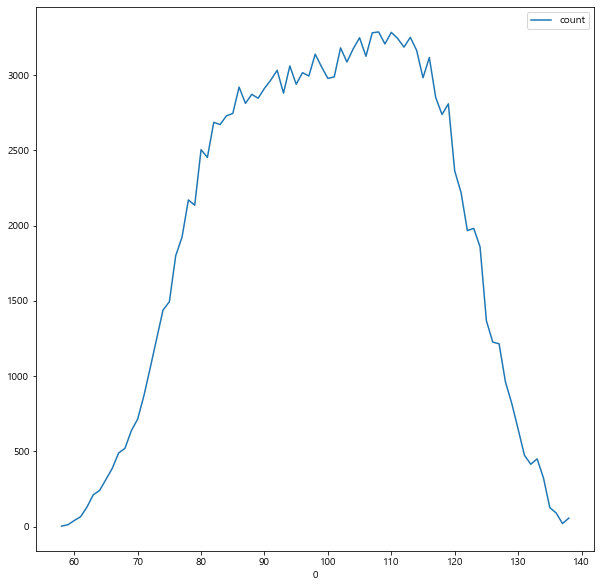

In [254]:
df_plot.plot()

# 시각화

In [255]:
# model.coef_

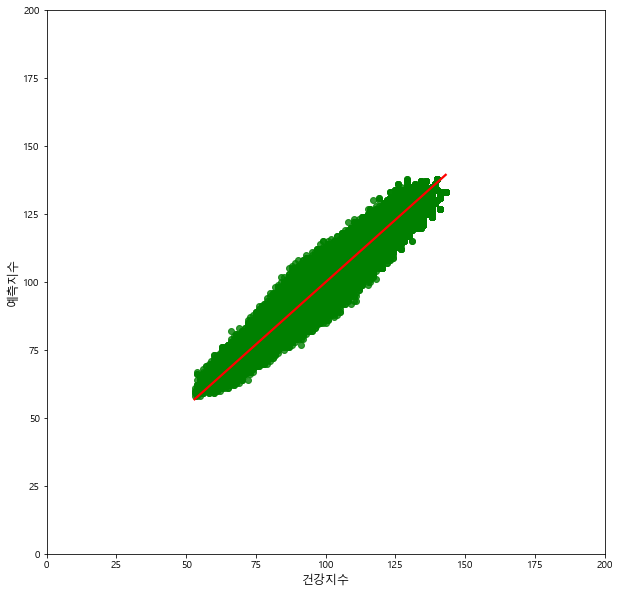

In [256]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), df_test.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([0, 200])
plt.ylim([0, 200])
plt.show()

# 남성 데이터 전체 계산

In [257]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
0,2019,62,421626,1,40,24.0,37.0,168.0,25.0,156.0,74.71,28.77,17.42,89.94,159.59,74.09,87.0
1,2020,62,565527,1,41,20.0,25.0,162.0,25.0,164.0,101.94,73.32,17.71,89.14,98.38,76.10,88.0
2,2021,62,699357,1,42,22.0,27.0,152.0,27.0,152.0,94.86,77.58,15.17,80.71,166.81,87.03,93.0
3,2022,62,1356310,1,43,18.0,20.0,80.0,20.0,151.0,112.79,99.79,100.86,100.50,155.90,113.97,107.0
4,2023,62,2170394,1,44,25.0,37.0,80.0,22.0,149.0,84.12,38.43,100.14,99.52,172.64,98.97,99.0


In [258]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453645 entries, 0 to 453644
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   검진년도               453645 non-null  int64  
 1   UID                453645 non-null  int64  
 2   CU_REC_ID          453645 non-null  int64  
 3   SEX                453645 non-null  int64  
 4   검진당시나이             453645 non-null  int64  
 5   AST(SGOT)          453645 non-null  float64
 6   ALT(SGPT)          453645 non-null  float64
 7   ALP                453645 non-null  float64
 8   r-GTP(GGT)         453645 non-null  float64
 9   유산탈수소효소 (LDH)      453645 non-null  float64
 10  AST(SGOT)_kde      453645 non-null  float64
 11  ALT(SGPT)_kde      453645 non-null  float64
 12  ALP_kde            453645 non-null  float64
 13  r-GTP(GGT)_kde     453645 non-null  float64
 14  유산탈수소효소 (LDH)_kde  453645 non-null  float64
 15  kde_mean           453645 non-null  float64
 16  ta

In [259]:
df_man[df_man['UID'] == 168996]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
68954,2022,168996,2259500,1,35,17.0,13.0,80.0,45.0,179.0,126.41,132.17,148.62,21.78,21.28,90.05,95.0
68955,2023,168996,2259499,1,36,17.0,14.0,80.0,26.0,173.0,123.40,126.63,120.10,80.14,31.58,96.37,98.0


In [260]:
train_columns

['AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [261]:
if scaling_bool:
    df_pred = df_man_scaled.copy()
else:
    df_pred = df_man.copy()

In [262]:
len(df_pred)

453645

In [263]:
df_pred.reset_index(drop=True, inplace=True)

In [264]:
X_test

tensor([[0.9659, 0.7207, 0.0000, 0.2797, 0.5109],
        [0.4830, 0.4505, 0.0894, 0.6573, 0.4672],
        [0.5114, 0.3063, 0.2529, 0.1958, 0.4672],
        ...,
        [0.2841, 0.3063, 0.0000, 0.1538, 0.1902],
        [0.1705, 0.1982, 0.0894, 0.2238, 0.2609],
        [0.2557, 0.3423, 0.0000, 0.2657, 0.3641]])

In [265]:
df_pred.columns

Index(['AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)'], dtype='object')

In [266]:
df_pred[train_columns]

,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)
0,0.539773,0.648649,0.517647,0.335664,0.423913
1,0.426136,0.432432,0.482353,0.335664,0.467391
2,0.482955,0.468468,0.423529,0.363636,0.402174
3,0.369318,0.342342,0.000000,0.265734,0.396739
4,0.568182,0.648649,0.000000,0.293706,0.385870
...,...,...,...,...,...
453640,0.397727,0.234234,0.000000,0.223776,0.532609
453641,0.454545,0.540541,0.089353,0.377622,0.467228
453642,0.284091,0.216216,0.017647,0.279720,0.478261
453643,0.284091,0.180180,0.000000,0.153846,0.217391


In [267]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        pred_data = model(torch.Tensor(df_pred[train_columns].to_numpy()))
        pred_data = pred_data.numpy()

In [268]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_pred[train_columns])

In [269]:
pred_data = pred_data.round(0)

In [270]:
pred_data

array([[ 81.],
       [ 88.],
       [ 88.],
       ...,
       [112.],
       [127.],
       [ 73.]], dtype=float32)

In [271]:
df_output = pd.concat([df_pred, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [272]:
df_output

,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),예측지수
0,0.539773,0.648649,0.517647,0.335664,0.423913,81.0
1,0.426136,0.432432,0.482353,0.335664,0.467391,88.0
2,0.482955,0.468468,0.423529,0.363636,0.402174,88.0
3,0.369318,0.342342,0.000000,0.265734,0.396739,108.0
4,0.568182,0.648649,0.000000,0.293706,0.385870,91.0
...,...,...,...,...,...,...
453640,0.397727,0.234234,0.000000,0.223776,0.532609,107.0
453641,0.454545,0.540541,0.089353,0.377622,0.467228,90.0
453642,0.284091,0.216216,0.017647,0.279720,0.478261,112.0
453643,0.284091,0.180180,0.000000,0.153846,0.217391,127.0


In [273]:
if scaling_bool:
#     df_output = pd.concat([df_man[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output], axis=1)
#     df_output = pd.concat([df_man, df_output], axis=1)
    df_output = pd.concat([df_man, df_output['예측지수']], axis=1)

In [274]:
df_output.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수
0,2019,62,421626,1,40,24.0,37.0,168.00,25.0,156.00,74.71,28.77,17.42,89.94,159.59,74.09,87.0,81.0
1,2020,62,565527,1,41,20.0,25.0,162.00,25.0,164.00,101.94,73.32,17.71,89.14,98.38,76.10,88.0,88.0
2,2021,62,699357,1,42,22.0,27.0,152.00,27.0,152.00,94.86,77.58,15.17,80.71,166.81,87.03,93.0,88.0
3,2022,62,1356310,1,43,18.0,20.0,80.00,20.0,151.00,112.79,99.79,100.86,100.50,155.90,113.97,107.0,108.0
4,2023,62,2170394,1,44,25.0,37.0,80.00,22.0,149.00,84.12,38.43,100.14,99.52,172.64,98.97,99.0,91.0
5,2022,67,1249745,1,54,28.0,33.0,95.19,41.0,185.00,51.30,42.32,100.00,42.18,19.78,51.12,75.0,76.0
6,2022,76,1377275,1,52,19.0,20.0,80.00,21.0,163.97,106.68,99.62,103.28,100.18,100.00,101.95,101.0,104.0
7,2021,77,621118,1,27,15.0,17.0,80.00,26.0,140.00,144.85,100.00,110.85,59.08,185.82,120.12,110.0,113.0
8,2022,77,1047599,1,28,20.0,20.0,86.00,23.0,170.00,99.18,87.58,66.23,83.50,23.07,71.91,86.0,100.0
9,2023,77,1739126,1,29,19.0,23.0,95.00,22.0,142.00,100.02,77.70,88.79,82.22,182.31,106.21,103.0,104.0


## 예측지수 성능평가

In [275]:
df_output.isnull().sum()

검진년도                 0
UID                  0
CU_REC_ID            0
SEX                  0
검진당시나이               0
AST(SGOT)            0
ALT(SGPT)            0
ALP                  0
r-GTP(GGT)           0
유산탈수소효소 (LDH)        0
AST(SGOT)_kde        0
ALT(SGPT)_kde        0
ALP_kde              0
r-GTP(GGT)_kde       0
유산탈수소효소 (LDH)_kde    0
kde_mean             0
target               0
예측지수                 0
dtype: int64

In [276]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['target'], df_output['예측지수'])

3.248804682075191

# target으로 나이 계산

In [277]:
df_output['예측나이'] = ((100 - df_output['예측지수']) / 5) + df_output['검진당시나이']
df_output['예측나이'] = df_output['예측나이'].round(2)

In [278]:
df_output.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수,예측나이
0,2019,62,421626,1,40,24.0,37.0,168.00,25.0,156.00,74.71,28.77,17.42,89.94,159.59,74.09,87.0,81.0,43.8
1,2020,62,565527,1,41,20.0,25.0,162.00,25.0,164.00,101.94,73.32,17.71,89.14,98.38,76.10,88.0,88.0,43.4
2,2021,62,699357,1,42,22.0,27.0,152.00,27.0,152.00,94.86,77.58,15.17,80.71,166.81,87.03,93.0,88.0,44.4
3,2022,62,1356310,1,43,18.0,20.0,80.00,20.0,151.00,112.79,99.79,100.86,100.50,155.90,113.97,107.0,108.0,41.4
4,2023,62,2170394,1,44,25.0,37.0,80.00,22.0,149.00,84.12,38.43,100.14,99.52,172.64,98.97,99.0,91.0,45.8
5,2022,67,1249745,1,54,28.0,33.0,95.19,41.0,185.00,51.30,42.32,100.00,42.18,19.78,51.12,75.0,76.0,58.8
6,2022,76,1377275,1,52,19.0,20.0,80.00,21.0,163.97,106.68,99.62,103.28,100.18,100.00,101.95,101.0,104.0,51.2
7,2021,77,621118,1,27,15.0,17.0,80.00,26.0,140.00,144.85,100.00,110.85,59.08,185.82,120.12,110.0,113.0,24.4
8,2022,77,1047599,1,28,20.0,20.0,86.00,23.0,170.00,99.18,87.58,66.23,83.50,23.07,71.91,86.0,100.0,28.0
9,2023,77,1739126,1,29,19.0,23.0,95.00,22.0,142.00,100.02,77.70,88.79,82.22,182.31,106.21,103.0,104.0,28.2


## 예측나이 성능평가

In [279]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['검진당시나이'], df_output['예측나이'])

2.4154226322344563

# 최종 산출

In [280]:
df_output.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수,예측나이
0,2019,62,421626,1,40,24.0,37.0,168.0,25.0,156.0,74.71,28.77,17.42,89.94,159.59,74.09,87.0,81.0,43.8
1,2020,62,565527,1,41,20.0,25.0,162.0,25.0,164.0,101.94,73.32,17.71,89.14,98.38,76.10,88.0,88.0,43.4
2,2021,62,699357,1,42,22.0,27.0,152.0,27.0,152.0,94.86,77.58,15.17,80.71,166.81,87.03,93.0,88.0,44.4
3,2022,62,1356310,1,43,18.0,20.0,80.0,20.0,151.0,112.79,99.79,100.86,100.50,155.90,113.97,107.0,108.0,41.4
4,2023,62,2170394,1,44,25.0,37.0,80.0,22.0,149.0,84.12,38.43,100.14,99.52,172.64,98.97,99.0,91.0,45.8


In [281]:
# df_output.to_csv('man.csv')

# 최종 UID별 확인

In [282]:
df_output

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수,예측나이
0,2019,62,421626,1,40,24.0,37.0,168.00,25.0,156.00,74.71,28.77,17.42,89.94,159.59,74.09,87.0,81.0,43.8
1,2020,62,565527,1,41,20.0,25.0,162.00,25.0,164.00,101.94,73.32,17.71,89.14,98.38,76.10,88.0,88.0,43.4
2,2021,62,699357,1,42,22.0,27.0,152.00,27.0,152.00,94.86,77.58,15.17,80.71,166.81,87.03,93.0,88.0,44.4
3,2022,62,1356310,1,43,18.0,20.0,80.00,20.0,151.00,112.79,99.79,100.86,100.50,155.90,113.97,107.0,108.0,41.4
4,2023,62,2170394,1,44,25.0,37.0,80.00,22.0,149.00,84.12,38.43,100.14,99.52,172.64,98.97,99.0,91.0,45.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453640,2024,1473554,2870504,1,29,19.0,14.0,80.00,17.0,176.00,100.02,108.86,100.00,100.17,13.38,84.49,92.0,107.0,27.6
453641,2024,1473563,2870572,1,39,21.0,31.0,95.19,28.0,163.97,100.00,56.29,100.00,74.00,100.00,86.06,93.0,90.0,41.0
453642,2024,1473599,2870970,1,26,15.0,13.0,83.00,21.0,166.00,140.50,107.41,139.98,90.52,58.43,107.37,104.0,112.0,23.6
453643,2024,1473602,2870997,1,53,15.0,11.0,80.00,12.0,118.00,164.00,167.05,123.37,158.74,193.52,161.34,131.0,127.0,47.6


In [283]:
# 성주용
df_output[df_output['UID'] == 897595].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수,예측나이
371272,2023,897595,2328772,1,40,11.0,18.0,80.0,26.0,185.0,195.04,101.94,133.06,85.97,15.40,106.28,103.0,108.0,38.4
371273,2024,897595,2329051,1,41,13.0,14.0,80.0,21.0,181.0,180.51,130.95,138.99,100.00,22.89,114.67,107.0,111.0,38.8


In [284]:
# 최재..
df_output[df_output['UID'] == 492764].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수,예측나이
285311,2022,492764,2823465,1,39,37.0,45.0,95.19,36.0,163.97,7.72,17.75,100.00,45.69,100.0,54.23,77.0,75.0,44.0
285312,2023,492764,2823466,1,40,31.0,37.0,95.19,33.0,163.97,28.08,28.77,100.00,56.04,100.0,62.58,81.0,79.0,44.2
285313,2024,492764,2783326,1,41,28.0,42.0,80.00,29.0,163.00,41.66,21.34,86.84,72.74,100.0,64.52,82.0,83.0,44.4


In [285]:
# 장경..
df_output[df_output['UID'] == 933936].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수,예측나이
377591,2023,933936,1435266,1,40,24.0,36.0,80.0,36.0,170.0,74.71,32.28,144.39,44.70,68.47,72.91,86.0,84.0,43.2
377592,2024,933936,2242997,1,41,19.0,32.0,80.0,38.0,155.0,106.21,45.36,138.99,41.61,149.99,96.43,98.0,93.0,42.4


In [286]:
# 한...
df_output[df_output['UID'] == 897603].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수,예측나이
371277,2022,897603,2555144,1,51,17.0,28.0,80.00,24.0,176.00,127.69,72.34,99.07,94.70,36.34,86.03,93.0,97.0,51.6
371278,2023,897603,2622260,1,52,18.0,31.0,95.19,18.0,163.97,113.64,48.07,100.00,110.44,100.00,94.43,97.0,97.0,52.6
371279,2024,897603,2555142,1,53,21.0,31.0,80.00,23.0,153.00,99.07,49.41,99.16,98.31,160.63,101.32,101.0,97.0,53.6


In [287]:
df_output[df_output['UID'] == 168996].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수,예측나이
68954,2022,168996,2259500,1,35,17.0,13.0,80.0,45.0,179.0,126.41,132.17,148.62,21.78,21.28,90.05,95.0,99.0,35.2
68955,2023,168996,2259499,1,36,17.0,14.0,80.0,26.0,173.0,123.40,126.63,120.10,80.14,31.58,96.37,98.0,106.0,34.8


In [288]:
# df_output.to_excel('./output/소화기능나이_남자.xlsx')
# df_output.to_csv('./output/03_숙취나이_결측치제거_20대_남자.csv')

# 여성 모델

In [289]:
df_target['SEX'].value_counts()

1    544242
2    392566
Name: SEX, dtype: int64

In [290]:
df_woman = df_target[df_target['SEX'] == 2]
len(df_woman)

392566

# 결측치 처리

## 결측치 삭제

In [291]:
# df_woman.dropna(inplace=True)

In [292]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
789089,2010,552037,332,2,41,16.0,10.0,46.0,8.0,170.0,112.83,119.18,102.30,158.48,28.19,104.20,102.0
583156,2010,710522,632,2,28,20.0,15.0,147.0,10.0,151.0,67.73,60.37,15.69,119.31,115.09,75.64,88.0
572011,2010,713853,1218,2,27,15.0,10.0,53.0,13.0,231.0,107.09,100.24,92.68,95.96,0.72,79.34,89.0
771173,2010,479951,1246,2,40,20.0,25.0,172.0,16.0,176.0,80.95,12.80,10.14,79.30,15.52,39.74,69.0
554310,2010,349208,1253,2,25,22.0,17.0,196.0,12.0,222.0,34.65,28.90,8.21,99.89,0.66,34.46,67.0


## 결측치 평균으로 대체

In [293]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [294]:
# 나이로 group by, 결측치를 평균으로 대체
# df_woman = df_woman.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [295]:
target_cols

['AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [296]:
len(df_woman)

392566

In [297]:
df_woman.dropna(subset=target_cols, how='all', inplace=True)

In [298]:
len(df_woman)

390189

In [299]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
789089,2010,552037,332,2,41,16.0,10.0,46.0,8.0,170.0,112.83,119.18,102.30,158.48,28.19,104.20,102.0
583156,2010,710522,632,2,28,20.0,15.0,147.0,10.0,151.0,67.73,60.37,15.69,119.31,115.09,75.64,88.0
572011,2010,713853,1218,2,27,15.0,10.0,53.0,13.0,231.0,107.09,100.24,92.68,95.96,0.72,79.34,89.0
771173,2010,479951,1246,2,40,20.0,25.0,172.0,16.0,176.0,80.95,12.80,10.14,79.30,15.52,39.74,69.0
554310,2010,349208,1253,2,25,22.0,17.0,196.0,12.0,222.0,34.65,28.90,8.21,99.89,0.66,34.46,67.0


In [300]:
len(df_woman)

390189

## fillna

In [301]:
df_woman.mean().round(2)

검진년도                    2021.89
UID                   505599.92
CU_REC_ID            1520353.18
SEX                        2.00
검진당시나이                    38.22
AST(SGOT)                 19.07
ALT(SGPT)                 14.93
ALP                       82.08
r-GTP(GGT)                16.57
유산탈수소효소 (LDH)            157.71
AST(SGOT)_kde             87.89
ALT(SGPT)_kde             83.39
ALP_kde                   81.07
r-GTP(GGT)_kde            80.75
유산탈수소효소 (LDH)_kde        103.45
kde_mean                  87.31
target                    93.48
dtype: float64

In [302]:
df_woman.fillna(df_woman.mean().round(2), inplace=True)

In [303]:
# df_woman.fillna(0, inplace=True)

## IterativeImputer

In [304]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_woman))
# df_impute.columns = df_woman.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [305]:
# import time
# start = time.time()
# np_imputed = mice(df_woman.values) # mice 학습시작
# df_woman = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

In [306]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
789089,2010,552037,332,2,41,16.0,10.0,46.0,8.0,170.0,112.83,119.18,102.30,158.48,28.19,104.20,102.0
583156,2010,710522,632,2,28,20.0,15.0,147.0,10.0,151.0,67.73,60.37,15.69,119.31,115.09,75.64,88.0
572011,2010,713853,1218,2,27,15.0,10.0,53.0,13.0,231.0,107.09,100.24,92.68,95.96,0.72,79.34,89.0
771173,2010,479951,1246,2,40,20.0,25.0,172.0,16.0,176.0,80.95,12.80,10.14,79.30,15.52,39.74,69.0
554310,2010,349208,1253,2,25,22.0,17.0,196.0,12.0,222.0,34.65,28.90,8.21,99.89,0.66,34.46,67.0


## ALP 스크리닝

In [307]:
screening = 80

In [308]:
df_woman[df_woman['ALP'] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
789089,2010,552037,332,2,41,16.0,10.0,46.0,8.0,170.00,112.83,119.18,102.30,158.48,28.19,104.20,102.0
572011,2010,713853,1218,2,27,15.0,10.0,53.0,13.0,231.00,107.09,100.24,92.68,95.96,0.72,79.34,89.0
572009,2010,336676,1469,2,27,16.0,11.0,46.0,16.0,157.71,101.14,100.00,100.07,63.52,100.00,92.95,96.0
628293,2010,705026,2857,2,31,18.0,21.0,42.0,14.0,157.71,94.19,19.40,106.53,86.20,100.00,81.26,90.0
884696,2010,677517,3071,2,49,15.0,3.0,37.0,12.0,137.00,127.79,197.74,137.85,102.07,176.79,148.45,124.0


In [309]:
len(df_woman[df_woman['ALP'] < screening])

212772

In [310]:
df_woman.loc[df_woman['ALP'] < screening, 'ALP'] = screening

In [311]:
df_woman[df_woman['ALP'] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target


In [312]:
len(df_woman[df_woman['ALP'] < screening])

0

In [313]:
len(df_woman)

390189

# 중복 제거

In [314]:
len(df_woman)

390189

In [315]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_woman.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [316]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
675064,2022,48,1140655,2,34,20.0,30.0,82.08,50.0,157.71,61.90,4.15,100.00,1.15,100.00,53.44,76.0
563797,2021,53,2632765,2,26,18.0,16.0,80.00,10.0,174.00,95.12,44.80,108.70,121.50,6.83,75.39,87.0
563796,2021,53,664316,2,26,18.0,16.0,80.00,10.0,174.00,95.12,44.80,108.70,121.50,6.83,75.39,87.0
588068,2023,53,2632764,2,28,19.0,15.0,82.08,12.0,157.71,80.57,60.37,100.00,100.00,100.00,88.19,94.0
609614,2024,53,2658222,2,29,16.0,9.0,80.00,10.0,172.00,106.35,111.10,96.92,111.63,14.92,88.18,94.0
613249,2020,54,497669,2,30,16.0,13.0,84.00,9.0,130.00,102.61,92.10,76.19,133.09,179.92,116.78,108.0
648240,2022,54,1319859,2,32,15.0,12.0,244.00,15.0,137.00,112.41,98.86,0.56,74.10,173.08,91.80,96.0
666324,2023,54,2039511,2,33,16.0,13.0,207.00,13.0,135.00,104.87,88.26,6.16,96.49,167.06,92.57,96.0
686978,2024,54,2750990,2,34,24.0,22.0,80.00,12.0,156.00,20.21,13.99,76.85,100.00,92.29,60.67,80.0
611673,2019,56,1605927,2,30,17.0,10.0,82.08,15.0,157.71,100.00,106.18,100.00,71.86,100.00,95.61,98.0


## first만 남겨두고 중복 제거

In [317]:
df_woman = df_woman.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [318]:
df_woman.reset_index(drop=True, inplace=True)

In [319]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
0,2022,48,1140655,2,34,20.0,30.0,82.08,50.0,157.71,61.90,4.15,100.00,1.15,100.00,53.44,76.0
1,2021,53,2632765,2,26,18.0,16.0,80.00,10.0,174.00,95.12,44.80,108.70,121.50,6.83,75.39,87.0
2,2023,53,2632764,2,28,19.0,15.0,82.08,12.0,157.71,80.57,60.37,100.00,100.00,100.00,88.19,94.0
3,2024,53,2658222,2,29,16.0,9.0,80.00,10.0,172.00,106.35,111.10,96.92,111.63,14.92,88.18,94.0
4,2020,54,497669,2,30,16.0,13.0,84.00,9.0,130.00,102.61,92.10,76.19,133.09,179.92,116.78,108.0
5,2022,54,1319859,2,32,15.0,12.0,244.00,15.0,137.00,112.41,98.86,0.56,74.10,173.08,91.80,96.0
6,2023,54,2039511,2,33,16.0,13.0,207.00,13.0,135.00,104.87,88.26,6.16,96.49,167.06,92.57,96.0
7,2024,54,2750990,2,34,24.0,22.0,80.00,12.0,156.00,20.21,13.99,76.85,100.00,92.29,60.67,80.0
8,2019,56,1605927,2,30,17.0,10.0,82.08,15.0,157.71,100.00,106.18,100.00,71.86,100.00,95.61,98.0
9,2020,56,1605928,2,31,17.0,9.0,82.08,15.0,157.71,100.00,113.13,100.00,73.35,100.00,97.30,99.0


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

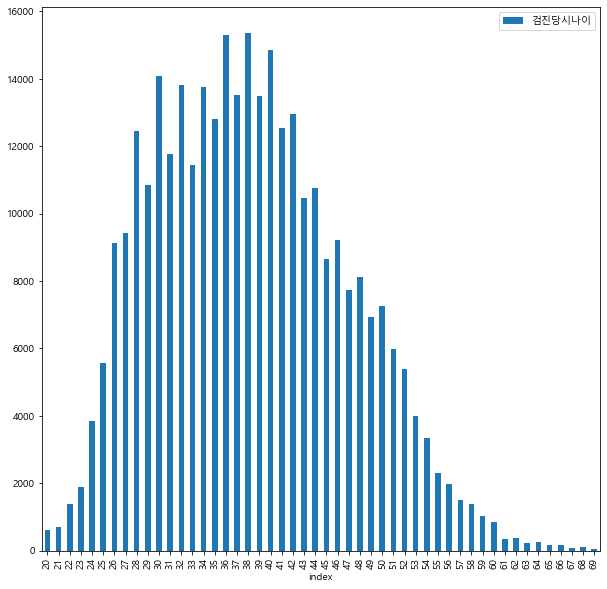

In [320]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [321]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
40,20,624
39,21,704
36,22,1376
33,23,1872
29,24,3841
26,25,5557
19,26,9136
17,27,9417
11,28,12436
14,29,10844


# 검진항목 시각화

In [322]:
df_woman.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
count,330152.000000,3.301520e+05,3.301520e+05,330152.0,330152.000000,330152.000000,330152.000000,330152.000000,330152.000000,330152.000000,330152.000000,330152.000000,330152.000000,330152.000000,330152.000000,330152.000000,330152.000000
mean,2021.836963,5.013734e+05,1.512184e+06,2.0,38.223231,19.108031,14.969736,98.538318,16.598547,157.897042,87.580674,83.136285,80.291846,80.490449,103.037932,86.907438,93.274413
std,1.728553,3.689520e+05,8.015886e+05,0.0,8.478382,5.023944,6.938707,35.392907,8.873188,23.301085,42.207894,42.484874,42.161627,42.502462,57.522487,27.913396,14.114521
min,2010.000000,4.800000e+01,3.320000e+02,2.0,20.000000,5.000000,0.000000,80.000000,0.590000,78.000000,0.250000,0.000000,0.260000,0.000000,0.010000,1.310000,50.000000
25%,2021.000000,2.171200e+05,6.794405e+05,2.0,32.000000,16.000000,10.000000,80.000000,11.000000,146.000000,59.900000,51.790000,34.590000,47.550000,75.610000,67.960000,84.000000
50%,2022.000000,3.753130e+05,1.464914e+06,2.0,38.000000,18.000000,13.000000,80.000000,14.000000,157.710000,95.930000,93.740000,100.000000,93.470000,100.000000,88.690000,94.000000
75%,2023.000000,8.257190e+05,2.197966e+06,2.0,44.000000,22.000000,17.000000,94.000000,19.000000,162.000000,108.560000,105.760000,102.810000,103.960000,158.530000,106.340000,103.000000
max,2024.000000,1.473631e+06,2.871442e+06,2.0,69.000000,40.200000,56.000000,250.000000,72.000000,262.000000,200.000000,199.990000,199.870000,199.980000,200.000000,189.010000,145.000000


<AxesSubplot:xlabel='검진당시나이'>

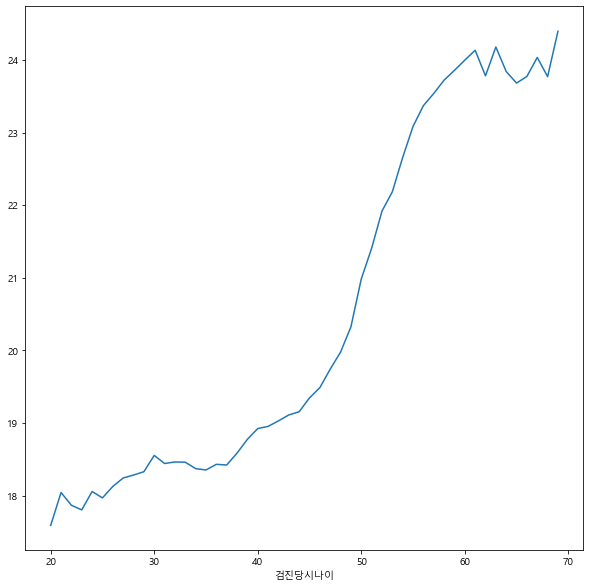

In [323]:
df_woman.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

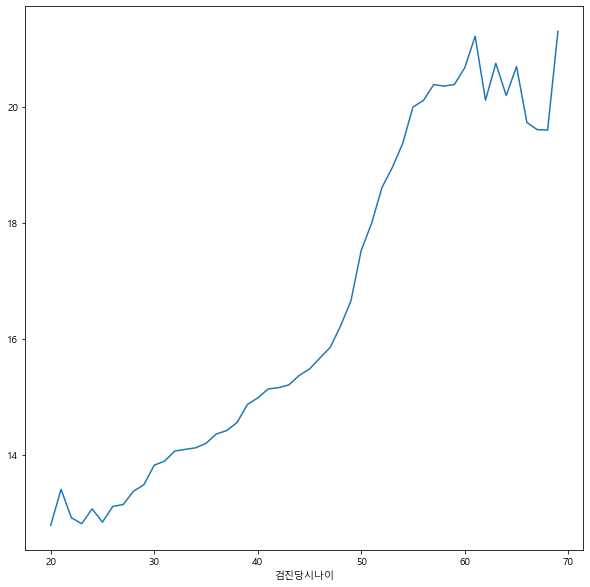

In [324]:
df_woman.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

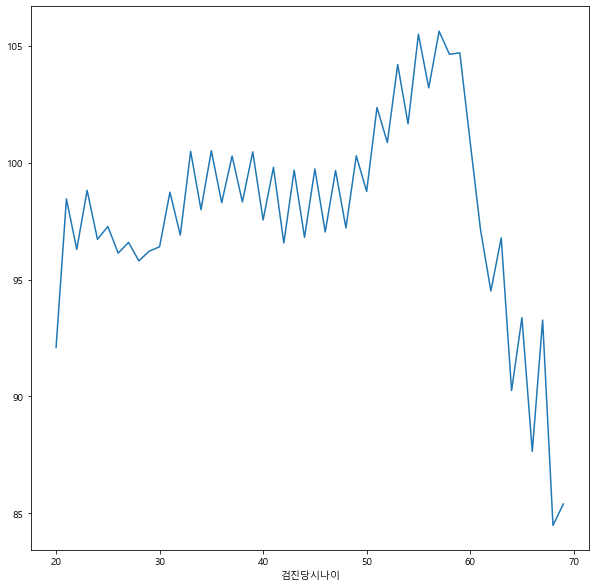

In [325]:
df_woman.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

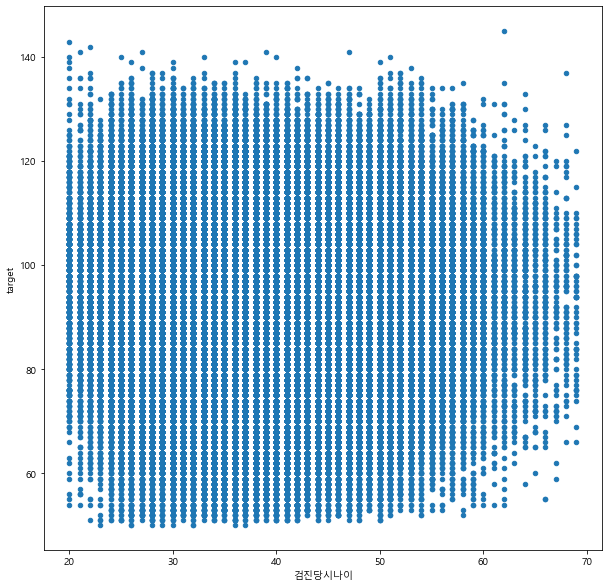

In [326]:
df_woman.plot.scatter(x='검진당시나이', y='target')

<AxesSubplot:xlabel='index'>

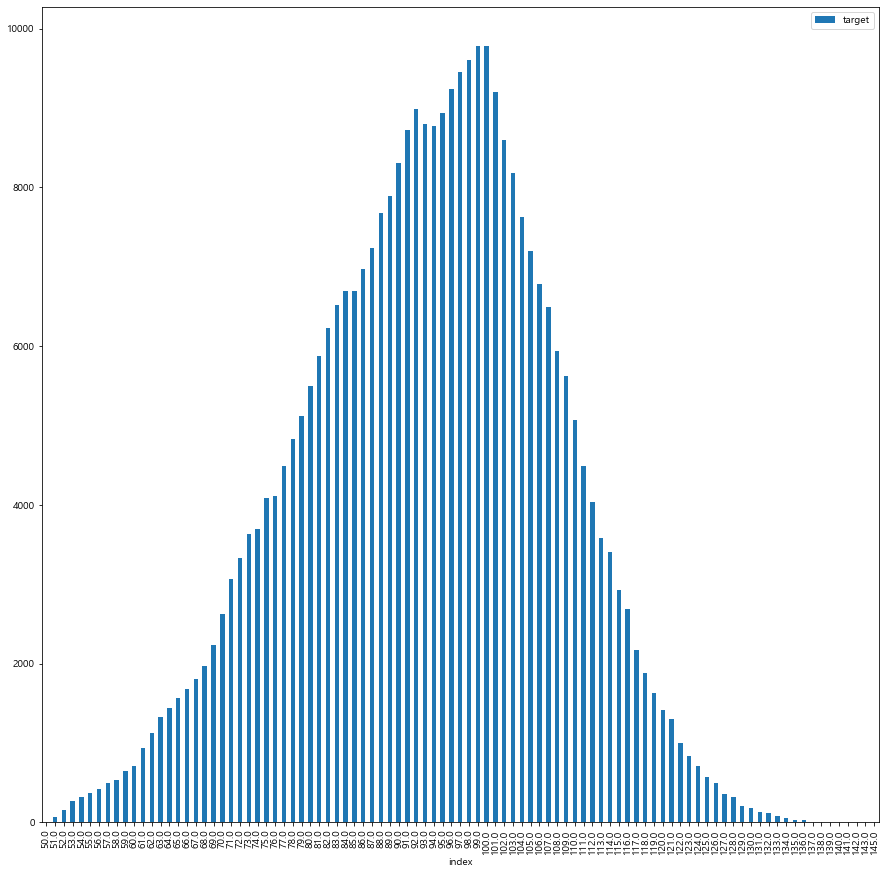

In [327]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

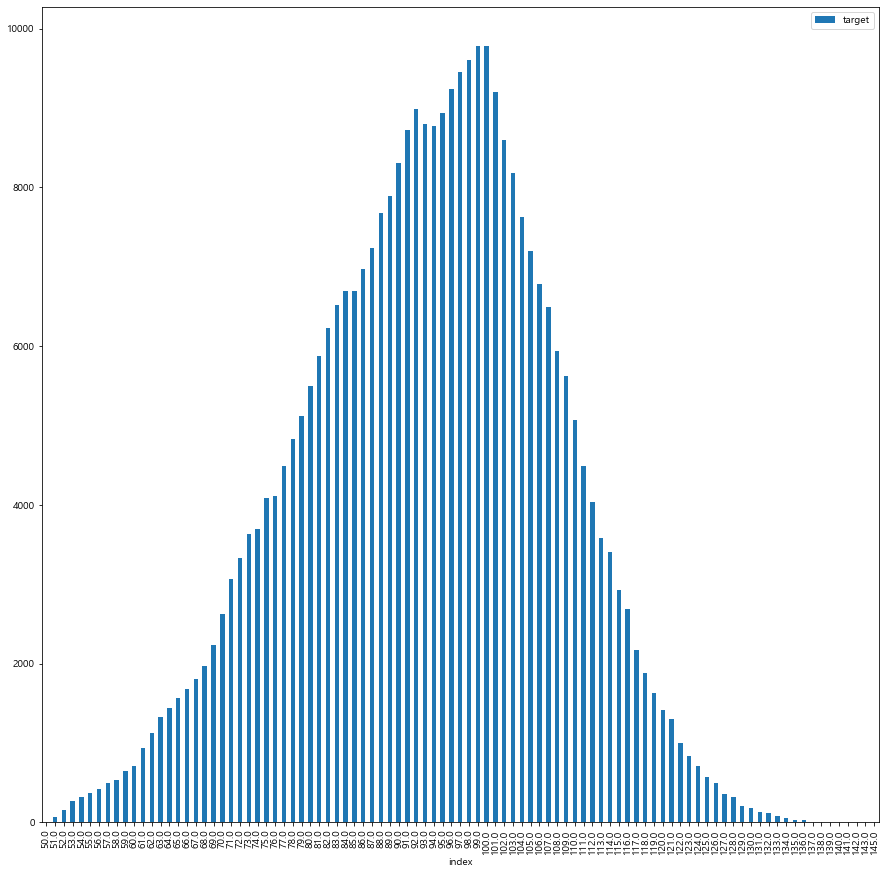

In [328]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [329]:
df_woman['target'].value_counts().reset_index().sort_values('index')

,index,target
87,50.0,10
82,51.0,66
78,52.0,159
75,53.0,265
74,54.0,317
71,55.0,375
70,56.0,422
68,57.0,501
67,58.0,536
65,59.0,642


In [330]:
df_woman_sampling = pd.DataFrame()

for target in range(int(df_woman['target'].min()), 100):
#     print(target, 200 - target)
    left_len = len(df_woman[df_woman['target'] == target])
    right_len = len(df_woman[df_woman['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == 100]])                    

In [331]:
# df_woman = df_woman_sampling.copy()

<AxesSubplot:xlabel='index'>

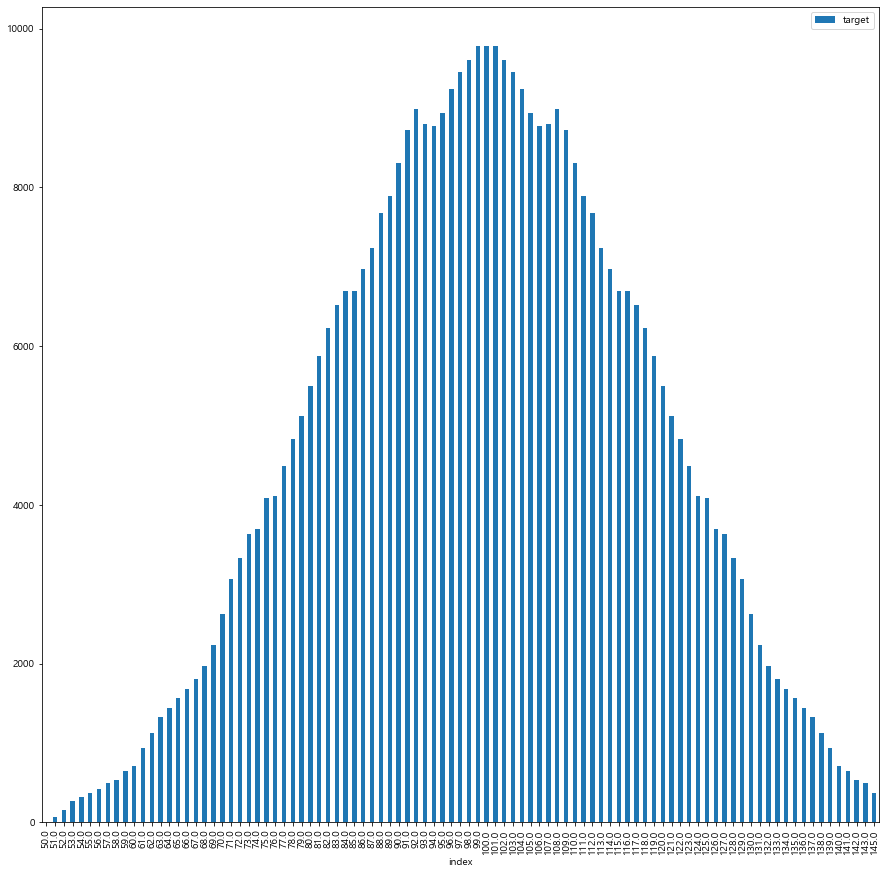

In [332]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [333]:
df_woman_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
94,50.0,10
93,51.0,66
92,52.0,159
91,53.0,265
90,54.0,317
89,55.0,375
87,56.0,422
86,57.0,501
84,58.0,536
81,59.0,642


# 나이별 확인하기

In [334]:
# df_woman['검진당시나이'].value_counts()

In [335]:
# int(df_woman['검진당시나이'].value_counts().mean())

In [336]:
# df_woman['검진당시나이'].min()

In [337]:
# df_woman['검진당시나이'].max()

In [338]:
# df_woman.columns

In [339]:
# df_temp = None
# # sample_len = int(df_woman['검진당시나이'].value_counts().mean())
# # sample_len = 500
                 
# for age in range(df_woman['검진당시나이'].min(), df_woman['검진당시나이'].max()):
#     temp_ = df_woman[df_woman['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [340]:
# df_temp.info()

In [341]:
# df_temp.reset_index(drop=True, inplace=True)

In [342]:
# df_woman = df_temp.copy()

In [343]:
# df_woman['검진당시나이'].value_counts()

In [344]:
# df_woman[df_woman['검진당시나이']==20]

In [345]:
# df_woman[df_woman['검진당시나이']==20]['UID'].value_counts()

# model train

In [346]:
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '신장', '체중']
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '체중']

In [347]:
train_columns

['AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [348]:
# target_col = '검진당시나이'

In [349]:
target_col

'target'

## Min Max Scaling

In [350]:
from sklearn.preprocessing import MinMaxScaler

In [351]:
scaling_bool

True

In [352]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_woman_sampling[train_columns])
    df_woman_sampling_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)
    
    data_scaler2 = scaler.fit_transform(df_woman[train_columns])
    df_woman_scaled = pd.DataFrame(data=data_scaler2, columns=train_columns)

## train_test_split

In [353]:
if scaling_bool:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling_scaled[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [354]:
# model2 = LinearRegression()

In [355]:
# model2.fit(X_train2, y_train2)

In [356]:
# model2.intercept_

In [357]:
# model2.coef_

## Randomized SearchCV, 파라미터 튜닝

In [358]:
# model2 = XGBRegressor()

In [359]:
# # A parameter grid for XGBoost
# params = {
#     'n_estimators':[500],
# #     'min_child_weight':[4,5], 
# #     'gamma':[i/10.0 for i in range(3,6)],  
# #     'subsample':[i/10.0 for i in range(6,11)],
# #     'colsample_bytree':[i/10.0 for i in range(6,11)], 
# #     'max_depth': [2,3,4,6,7],
#     'objective': ['reg:squarederror', 'reg:tweedie'],
#     'booster': ['gbtree', 'gblinear'],
#     'eval_metric': ['rmse'],
#     'eta': [i/10.0 for i in range(3,6)],
# }

In [360]:
# # run randomized search
# n_iter_search = 10

# random_search = RandomizedSearchCV(model2, param_distributions=params,
#                                    n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [361]:
# import time
# start = time.time()
# random_search.fit(X_train2, y_train2)
# print("RandomizedSearchCV took %.2f seconds for %d candidates"
#       " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

In [362]:
# # best parameter
# random_search.best_params_

In [363]:
# # best score
# random_search.best_score_

In [364]:
# model2 = random_search.best_estimator_
# model2

## Keras

In [365]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [366]:
# model = build_model()

In [367]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [368]:
# model.summary()

In [369]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [370]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [371]:
# plot_history(history)

## pyTorch 신경망

In [372]:
np.shape(X_train)[1]

5

In [373]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [374]:
model2 = Regressor()
reg_loss2 = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
optimizer2 = optim.Adam(model2.parameters())

In [375]:
# epochs = 1000

In [376]:
X_train2  = torch.Tensor(X_train2.to_numpy())
X_test2  = torch.Tensor(X_test2.to_numpy())
y_train2  = torch.Tensor(y_train2.to_numpy().reshape(-1, 1))
y_test2  = torch.Tensor(y_test2.to_numpy().reshape(-1, 1))

In [377]:
import time
start = time.time()

losses2 = []

# 총 100번의 에포크 동안 모델 학습
for epoch in range(epochs):
    optimizer2.zero_grad()      # 옵티마이저의 기울기 초기화
    y_pred2 = model2(X_train2)          # 순전파 연산으로 예측값 계산
    loss = reg_loss2(y_pred2, y_train2)  # 손실 함수로 비용 계산
    loss.backward()            # 역전파 연산으로 기울기 계산
    optimizer2.step()           # 옵티마이저를 통해 파라미터 업데이트

    # 10번째 에포크마다 현재 에포크와 손실 값 출력
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

    # 손실 값을 리스트에 추가하여 추적
    losses2.append(loss.item())
    
end = time.time()
print(f"{end - start:.5f} sec")

Epoch    0/500 Cost: 10240.860352
Epoch   10/500 Cost: 9994.250000
Epoch   20/500 Cost: 9447.863281
Epoch   30/500 Cost: 8383.231445
Epoch   40/500 Cost: 6591.069336
Epoch   50/500 Cost: 4110.401367
Epoch   60/500 Cost: 1773.956787
Epoch   70/500 Cost: 1079.864014
Epoch   80/500 Cost: 1078.384766
Epoch   90/500 Cost: 882.227478
Epoch  100/500 Cost: 823.373474
Epoch  110/500 Cost: 752.101501
Epoch  120/500 Cost: 695.216919
Epoch  130/500 Cost: 641.913208
Epoch  140/500 Cost: 591.199341
Epoch  150/500 Cost: 542.812134
Epoch  160/500 Cost: 496.138000
Epoch  170/500 Cost: 451.069672
Epoch  180/500 Cost: 407.510681
Epoch  190/500 Cost: 365.491364
Epoch  200/500 Cost: 325.108093
Epoch  210/500 Cost: 286.552185
Epoch  220/500 Cost: 250.122482
Epoch  230/500 Cost: 216.222900
Epoch  240/500 Cost: 185.302780
Epoch  250/500 Cost: 157.746338
Epoch  260/500 Cost: 133.795685
Epoch  270/500 Cost: 113.514023
Epoch  280/500 Cost: 96.789055
Epoch  290/500 Cost: 83.354347
Epoch  300/500 Cost: 72.813477
E

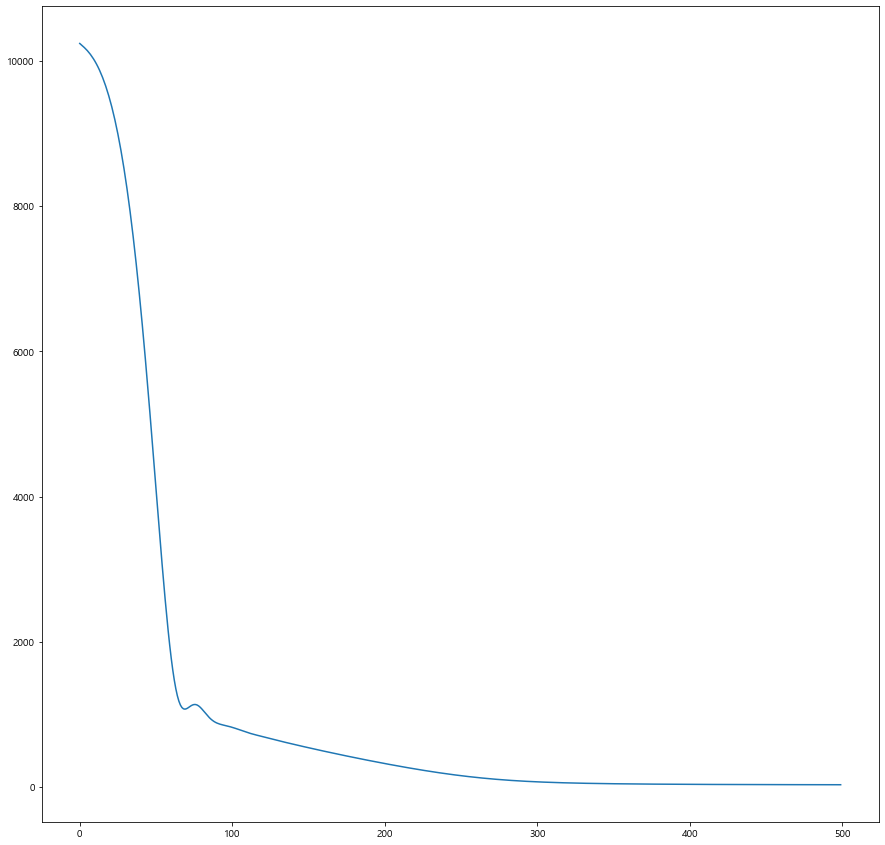

In [378]:
plt.plot(losses2)

## coef 계산

In [379]:
# df_coef2 = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model2.coef_).reset_index(drop=True)], axis=1)

In [380]:
# df_coef2.columns = ['검사항목', 'coef']

In [381]:
# df_coef2['coef'] = df_coef2['coef'].round(4)

In [382]:
# df_coef2['abs_coef'] = df_coef2['coef'].abs()

In [383]:
# df_coef2.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [384]:
# from sklearn.preprocessing import PolynomialFeatures
# poly2 = PolynomialFeatures(degree=1, include_bias=False)

In [385]:
# X_train2_poly = poly2.fit_transform(X_train2)
# X_test2_poly = poly2.fit_transform(X_test2)

In [386]:
# slr2 = LinearRegression()

In [387]:
# slr2.fit(X_train2_poly, y_train2)

In [388]:
# np.shape(X_train2)

In [389]:
# np.shape(X_train2_poly)

In [390]:
# np.shape(X_test2)

In [391]:
# np.shape(X_test2_poly)

In [392]:
# y_pred2_poly = slr2.predict(X_test2_poly)

In [393]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test2, y_pred2_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test2, y_pred2_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2_poly)))

In [394]:
# from sklearn.metrics import r2_score
# r2_score(y_test2, y_pred2_poly)

# model save

In [395]:
# model_path2 = './model/03/11/20/best_estimator2.pkl'

In [396]:
# import pickle
# with open(model_path2,'wb') as f:
#     pickle.dump(model2, f)

In [397]:
# with open(model_path2, 'rb') as f:
#     model2 = pickle.load(f)

In [398]:
# Get predictions
# y_pred2 = model2.predict(X_test2)

# 성능 평가

## pyTorch 예측

In [399]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model2.eval()
        y_pred2 = model2(X_test2)
        y_pred2 = y_pred2.numpy()

## XGBRegressor

In [400]:
if XGB_bool:
    y_pred2 = model2.predict(X_test2)

In [401]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test2, y_pred2))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test2, y_pred2))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2)))

MAE : 4.281099
MSE : 32.75911
RMSE : 5.7235575


In [402]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)

0.8928989432836013

In [403]:
if XGB_bool:
    model2.score(X_test2, y_test2)

## feature importance

In [404]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model2)

# 실제나이 - 예측나이 결과

In [405]:
df_test2 = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), pd.DataFrame(y_pred2).reset_index(drop=True)], axis=1)

In [406]:
df_test2.head()

,0,0
0,115.0,114.179779
1,106.0,109.114922
2,87.0,93.993607
3,93.0,98.489220
4,84.0,91.136284


In [407]:
df_test2.columns

Int64Index([0, 0], dtype='int64')

In [408]:
df_test2.columns = ['실제지수', '예측지수']

In [409]:
df_test2['diff'] = df_test2['예측지수'] - df_test2['실제지수']

In [410]:
df_test2.head()

,실제지수,예측지수,diff
0,115.0,114.179779,-0.820221
1,106.0,109.114922,3.114922
2,87.0,93.993607,6.993607
3,93.0,98.489220,5.489220
4,84.0,91.136284,7.136284


In [411]:
df_test2['diff_int'] = df_test2['diff'].round(0)

In [412]:
len(df_test2)

109636

In [413]:
df_test2.head()

,실제지수,예측지수,diff,diff_int
0,115.0,114.179779,-0.820221,-1.0
1,106.0,109.114922,3.114922,3.0
2,87.0,93.993607,6.993607,7.0
3,93.0,98.489220,5.489220,5.0
4,84.0,91.136284,7.136284,7.0


<AxesSubplot:>

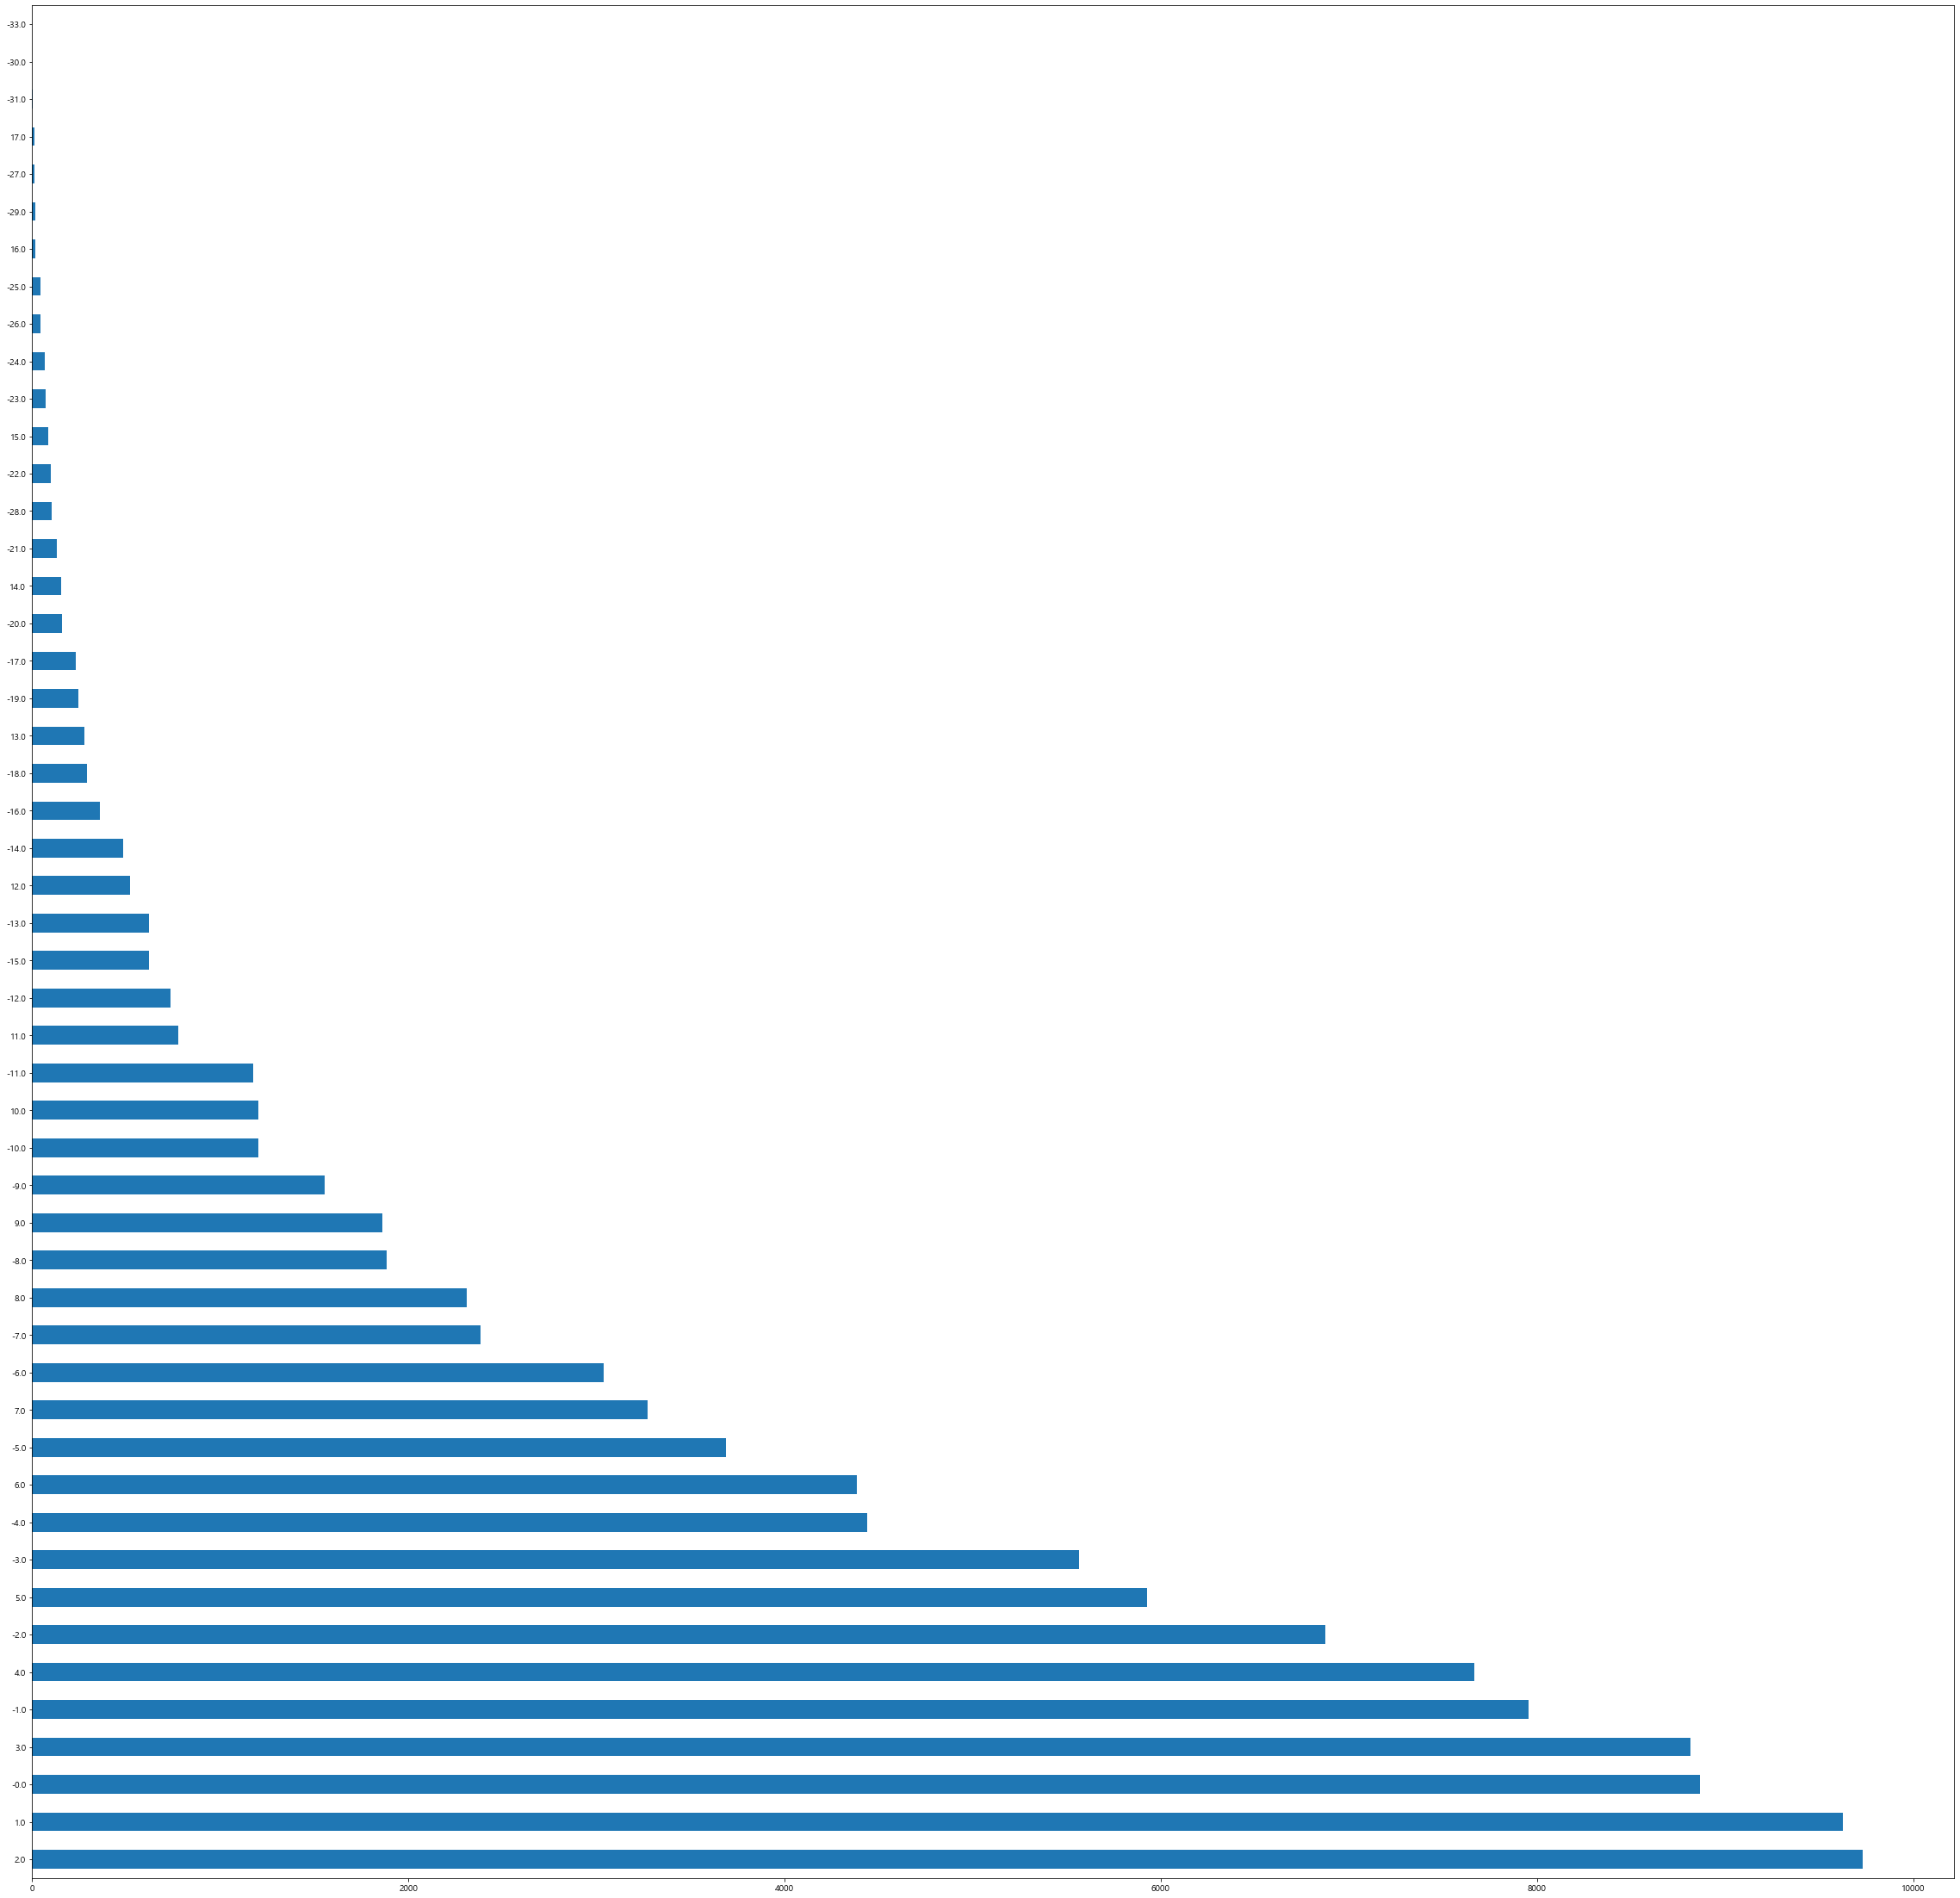

In [414]:
plt.figure(figsize=(40, 40))
df_test2['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_여자.png')

# 예측 나이 분포

In [415]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_train_pred2 = model2(X_train2)
        X_train_pred2 = X_train_pred2.numpy()

    df_train2 = pd.DataFrame(X_train_pred2).reset_index(drop=True)
    y_test2 = pd.DataFrame(y_test2)

In [416]:
if XGB_bool:
    df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [417]:
df_train2.round(0).value_counts()

102.0    7248
105.0    7247
104.0    7219
107.0    7215
98.0     7196
100.0    7142
103.0    7090
111.0    7075
109.0    7063
101.0    7028
108.0    7012
106.0    7004
99.0     6996
97.0     6954
110.0    6946
96.0     6918
93.0     6827
95.0     6742
94.0     6649
92.0     6644
112.0    6518
91.0     6437
113.0    6335
90.0     6332
89.0     6224
88.0     6140
115.0    6019
114.0    5950
117.0    5937
87.0     5768
116.0    5548
86.0     5516
85.0     5278
84.0     5277
119.0    5195
118.0    5028
83.0     4844
120.0    4594
82.0     4569
81.0     4398
121.0    4345
80.0     4112
123.0    4014
79.0     3817
122.0    3749
78.0     3689
77.0     3334
124.0    3332
126.0    3189
125.0    3188
76.0     3139
75.0     2869
127.0    2578
74.0     2529
73.0     2375
128.0    2172
72.0     2150
71.0     2088
130.0    1991
129.0    1895
70.0     1807
69.0     1539
68.0     1397
131.0    1243
67.0     1151
66.0     1100
65.0      987
132.0     919
133.0     844
64.0      737
63.0      630
62.0  

In [418]:
y_test2.value_counts()

99.0     2485
100.0    2460
101.0    2448
97.0     2407
102.0    2382
98.0     2374
96.0     2366
104.0    2355
103.0    2283
95.0     2271
106.0    2235
92.0     2226
94.0     2221
105.0    2197
108.0    2174
93.0     2169
109.0    2165
107.0    2147
90.0     2138
91.0     2069
110.0    2068
111.0    2000
89.0     1991
112.0    1977
88.0     1927
113.0    1802
87.0     1786
114.0    1760
86.0     1745
116.0    1727
85.0     1682
84.0     1673
115.0    1640
83.0     1618
117.0    1598
118.0    1568
82.0     1535
81.0     1483
80.0     1435
119.0    1435
120.0    1355
79.0     1304
121.0    1283
78.0     1219
122.0    1171
123.0    1105
76.0     1078
77.0     1075
124.0    1014
125.0    1010
75.0      997
126.0     953
74.0      947
73.0      895
127.0     892
128.0     852
71.0      809
129.0     796
72.0      773
70.0      674
130.0     631
69.0      564
131.0     542
132.0     494
68.0      473
67.0      465
133.0     455
66.0      440
134.0     428
65.0      414
135.0     384
64.0  

In [419]:
df_plot = pd.DataFrame(y_test2.value_counts())

In [420]:
df_plot.columns = ['count']

In [421]:
df_plot.reset_index(inplace=True)

In [422]:
df_plot = df_plot.sort_values(0, ascending=True)

In [423]:
df_plot.set_index(0, inplace=True)

<AxesSubplot:xlabel='0'>

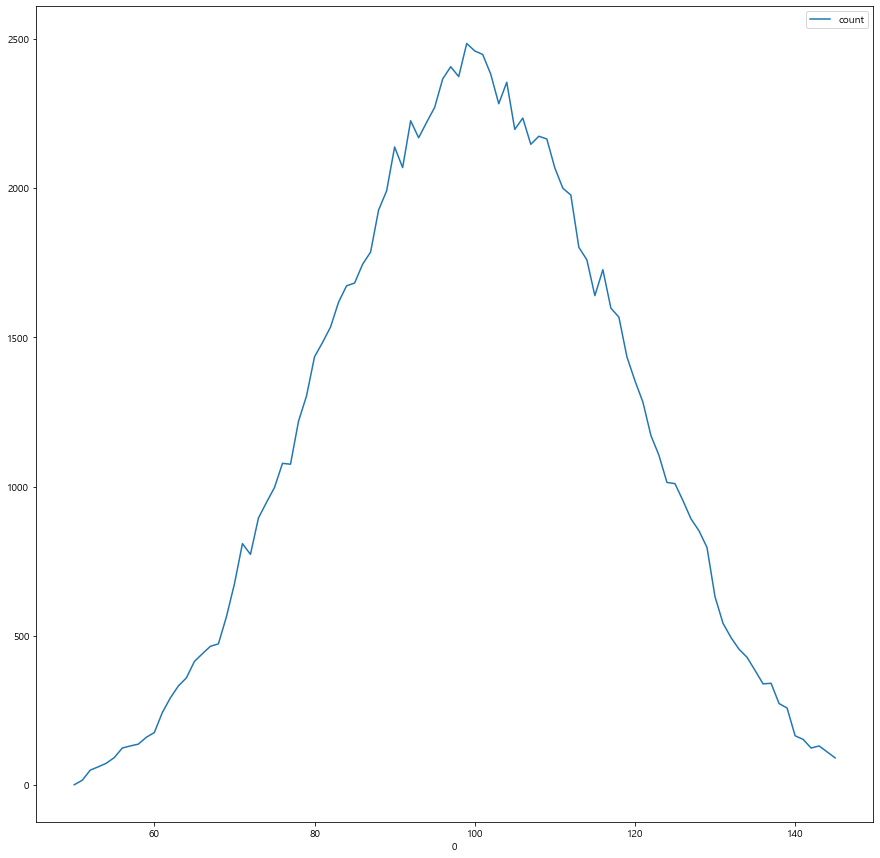

In [424]:
df_plot.plot()

In [425]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_test_pred2 = model2(X_test2)
        X_test_pred2 = X_test_pred2.numpy()
    df_test2 = pd.DataFrame(X_test_pred2).reset_index(drop=True)

In [426]:
if XGB_bool:
    df_test2 = pd.DataFrame(model2.predict(X_test2)).reset_index(drop=True)

In [427]:
df_test2.round(0).value_counts()

107.0    2403
96.0     2401
103.0    2395
104.0    2391
100.0    2390
105.0    2378
98.0     2357
97.0     2351
99.0     2346
102.0    2344
110.0    2309
95.0     2307
109.0    2304
108.0    2292
106.0    2279
93.0     2277
111.0    2260
101.0    2252
91.0     2250
94.0     2188
112.0    2174
92.0     2170
90.0     2157
113.0    2134
89.0     2095
88.0     2072
114.0    2003
115.0    1984
87.0     1957
117.0    1956
86.0     1886
116.0    1830
119.0    1743
84.0     1738
85.0     1709
118.0    1679
83.0     1633
120.0    1591
82.0     1525
121.0    1459
81.0     1442
123.0    1356
80.0     1348
79.0     1283
122.0    1227
78.0     1215
77.0     1141
124.0    1109
76.0     1072
126.0    1030
125.0    1022
75.0      987
127.0     871
74.0      847
73.0      789
128.0     721
72.0      705
71.0      682
129.0     672
130.0     670
70.0      571
69.0      532
68.0      486
131.0     414
67.0      410
66.0      352
65.0      334
132.0     320
133.0     286
64.0      253
63.0      221
62.0  

In [428]:
df_plot2 = pd.DataFrame(df_test2.round(0).value_counts())

In [429]:
df_plot2.columns = ['count']

In [430]:
df_plot2.reset_index(inplace=True)

In [431]:
df_plot2

,0,count
0,107.0,2403
1,96.0,2401
2,103.0,2395
3,104.0,2391
4,100.0,2390
5,105.0,2378
6,98.0,2357
7,97.0,2351
8,99.0,2346
9,102.0,2344


In [432]:
df_plot2 = df_plot2.sort_values(0, ascending=True)

In [433]:
df_plot2.set_index(0, inplace=True)

In [434]:
df_plot2

,count
0,
42.0,1
43.0,1
46.0,3
47.0,1
48.0,2
49.0,3
50.0,6
51.0,7
52.0,14


<AxesSubplot:xlabel='0'>

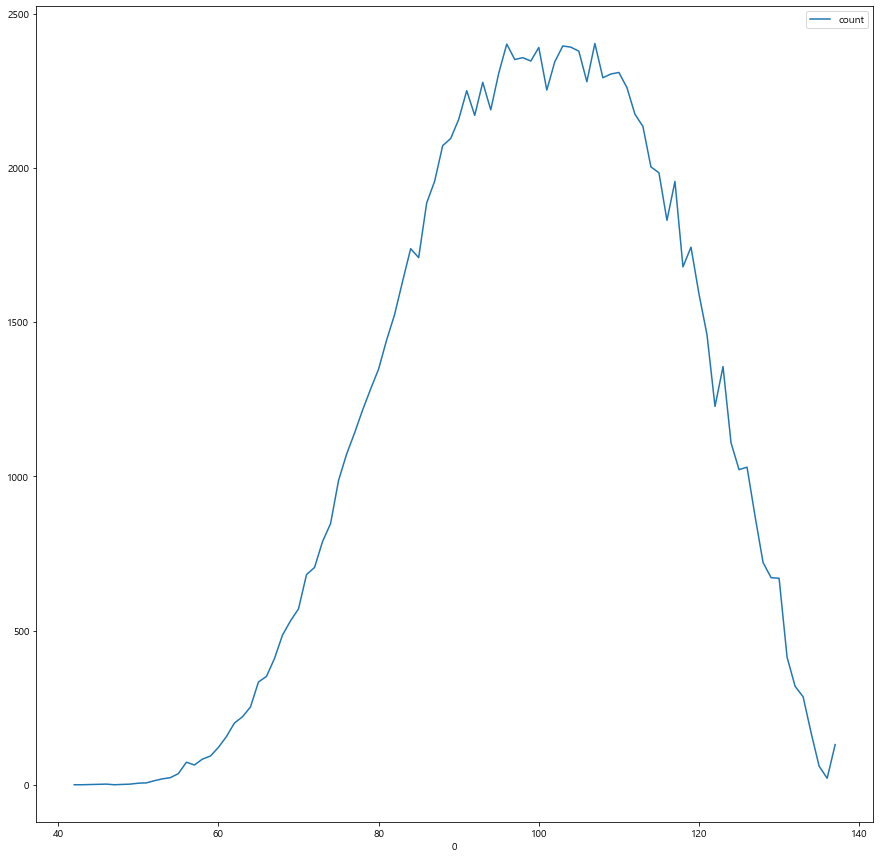

In [435]:
df_plot2.plot()

# 시각화

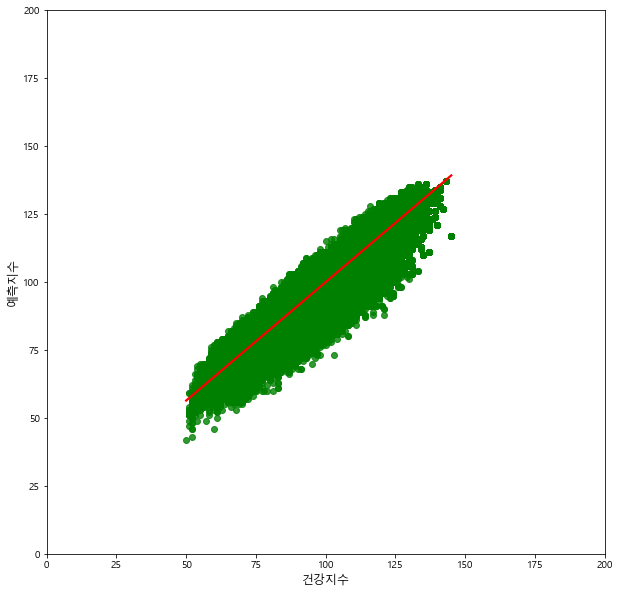

In [436]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), df_test2.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([0, 200])
plt.ylim([0, 200])
plt.show()

# 여성 데이터 전체 계산

In [437]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
0,2022,48,1140655,2,34,20.0,30.0,82.08,50.0,157.71,61.90,4.15,100.00,1.15,100.00,53.44,76.0
1,2021,53,2632765,2,26,18.0,16.0,80.00,10.0,174.00,95.12,44.80,108.70,121.50,6.83,75.39,87.0
2,2023,53,2632764,2,28,19.0,15.0,82.08,12.0,157.71,80.57,60.37,100.00,100.00,100.00,88.19,94.0
3,2024,53,2658222,2,29,16.0,9.0,80.00,10.0,172.00,106.35,111.10,96.92,111.63,14.92,88.18,94.0
4,2020,54,497669,2,30,16.0,13.0,84.00,9.0,130.00,102.61,92.10,76.19,133.09,179.92,116.78,108.0


In [438]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330152 entries, 0 to 330151
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   검진년도               330152 non-null  int64  
 1   UID                330152 non-null  int64  
 2   CU_REC_ID          330152 non-null  int64  
 3   SEX                330152 non-null  int64  
 4   검진당시나이             330152 non-null  int64  
 5   AST(SGOT)          330152 non-null  float64
 6   ALT(SGPT)          330152 non-null  float64
 7   ALP                330152 non-null  float64
 8   r-GTP(GGT)         330152 non-null  float64
 9   유산탈수소효소 (LDH)      330152 non-null  float64
 10  AST(SGOT)_kde      330152 non-null  float64
 11  ALT(SGPT)_kde      330152 non-null  float64
 12  ALP_kde            330152 non-null  float64
 13  r-GTP(GGT)_kde     330152 non-null  float64
 14  유산탈수소효소 (LDH)_kde  330152 non-null  float64
 15  kde_mean           330152 non-null  float64
 16  ta

In [439]:
df_woman[df_woman['UID'] == 196909]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
69937,2021,196909,2495703,2,28,18.0,9.0,80.0,11.0,150.0,91.80,114.77,111.77,106.28,124.72,109.87,105.0
69938,2022,196909,2495702,2,29,18.0,10.0,80.0,10.0,149.0,95.19,101.81,99.86,111.63,120.62,105.82,103.0
69939,2023,196909,2495700,2,30,18.0,18.0,80.0,13.0,127.0,97.42,33.65,140.60,94.93,183.16,109.95,105.0
69940,2024,196909,2495697,2,31,15.0,8.0,80.0,10.0,149.0,113.49,132.54,100.43,115.14,123.50,117.02,108.0


In [440]:
if scaling_bool:
    df_pred2 = df_woman_scaled.copy()
else:
    df_pred2 = df_woman.copy()

In [441]:
len(df_pred2)

330152

In [442]:
df_pred2.reset_index(drop=True, inplace=True)

In [443]:
X_test2

tensor([[0.3429, 0.1607, 0.0000, 0.1164, 0.2880],
        [0.3143, 0.1607, 0.0000, 0.1164, 0.4332],
        [0.4571, 0.2286, 0.0000, 0.1164, 0.5326],
        ...,
        [0.2857, 0.2321, 0.0000, 0.1304, 0.4239],
        [0.2857, 0.1250, 0.0000, 0.1445, 0.4076],
        [0.5143, 0.2679, 0.0000, 0.1725, 0.4891]])

In [444]:
df_pred2.columns

Index(['AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)'], dtype='object')

In [445]:
df_pred2[train_columns]

,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)
0,0.426136,0.535714,0.012235,0.691920,0.433207
1,0.369318,0.285714,0.000000,0.131774,0.521739
2,0.397727,0.267857,0.012235,0.159782,0.433207
3,0.312500,0.160714,0.000000,0.131774,0.510870
4,0.312500,0.232143,0.023529,0.117771,0.282609
...,...,...,...,...,...
330147,0.681818,0.446429,0.012235,0.243803,0.433207
330148,0.539773,0.285714,0.012235,0.257807,0.433207
330149,0.454545,0.214286,0.000000,0.215796,0.614130
330150,0.681818,0.482143,0.012235,0.187789,0.433207


In [446]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        pred_data2 = model2(torch.Tensor(df_pred2[train_columns].to_numpy()))
        pred_data2 = pred_data2.numpy()

In [447]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_pred2[train_columns])

In [448]:
pred_data2

array([[ 72.830345],
       [ 94.854095],
       [ 96.4016  ],
       ...,
       [ 87.66525 ],
       [ 79.706436],
       [106.9384  ]], dtype=float32)

In [449]:
df_output2 = pd.concat([df_pred2, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [450]:
if scaling_bool:
#     df_output2 = pd.concat([df_woman[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output2], axis=1)
    df_output2 = pd.concat([df_woman, df_output2['예측지수']], axis=1)

In [451]:
df_output2.head(10)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수
0,2022,48,1140655,2,34,20.0,30.0,82.08,50.0,157.71,61.90,4.15,100.00,1.15,100.00,53.44,76.0,72.830345
1,2021,53,2632765,2,26,18.0,16.0,80.00,10.0,174.00,95.12,44.80,108.70,121.50,6.83,75.39,87.0,94.854095
2,2023,53,2632764,2,28,19.0,15.0,82.08,12.0,157.71,80.57,60.37,100.00,100.00,100.00,88.19,94.0,96.401604
3,2024,53,2658222,2,29,16.0,9.0,80.00,10.0,172.00,106.35,111.10,96.92,111.63,14.92,88.18,94.0,104.850624
4,2020,54,497669,2,30,16.0,13.0,84.00,9.0,130.00,102.61,92.10,76.19,133.09,179.92,116.78,108.0,111.047134
5,2022,54,1319859,2,32,15.0,12.0,244.00,15.0,137.00,112.41,98.86,0.56,74.10,173.08,91.80,96.0,93.618271
6,2023,54,2039511,2,33,16.0,13.0,207.00,13.0,135.00,104.87,88.26,6.16,96.49,167.06,92.57,96.0,93.050613
7,2024,54,2750990,2,34,24.0,22.0,80.00,12.0,156.00,20.21,13.99,76.85,100.00,92.29,60.67,80.0,86.998756
8,2019,56,1605927,2,30,17.0,10.0,82.08,15.0,157.71,100.00,106.18,100.00,71.86,100.00,95.61,98.0,101.778488
9,2020,56,1605928,2,31,17.0,9.0,82.08,15.0,157.71,100.00,113.13,100.00,73.35,100.00,97.30,99.0,102.777405


## 예측지수 성능평가

In [452]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['target'], df_output2['예측지수'])

4.19453601198895

# target으로 나이 계산

In [453]:
df_output2['예측나이'] = ((100 - df_output2['예측지수']) / 5) + df_output2['검진당시나이']
df_output2['예측나이'] = df_output2['예측나이'].round(2)

In [454]:
df_output2.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수,예측나이
0,2022,48,1140655,2,34,20.0,30.0,82.08,50.0,157.71,61.90,4.15,100.00,1.15,100.00,53.44,76.0,72.830345,39.43
1,2021,53,2632765,2,26,18.0,16.0,80.00,10.0,174.00,95.12,44.80,108.70,121.50,6.83,75.39,87.0,94.854095,27.03
2,2023,53,2632764,2,28,19.0,15.0,82.08,12.0,157.71,80.57,60.37,100.00,100.00,100.00,88.19,94.0,96.401604,28.72
3,2024,53,2658222,2,29,16.0,9.0,80.00,10.0,172.00,106.35,111.10,96.92,111.63,14.92,88.18,94.0,104.850624,28.03
4,2020,54,497669,2,30,16.0,13.0,84.00,9.0,130.00,102.61,92.10,76.19,133.09,179.92,116.78,108.0,111.047134,27.79
5,2022,54,1319859,2,32,15.0,12.0,244.00,15.0,137.00,112.41,98.86,0.56,74.10,173.08,91.80,96.0,93.618271,33.28
6,2023,54,2039511,2,33,16.0,13.0,207.00,13.0,135.00,104.87,88.26,6.16,96.49,167.06,92.57,96.0,93.050613,34.39
7,2024,54,2750990,2,34,24.0,22.0,80.00,12.0,156.00,20.21,13.99,76.85,100.00,92.29,60.67,80.0,86.998756,36.60
8,2019,56,1605927,2,30,17.0,10.0,82.08,15.0,157.71,100.00,106.18,100.00,71.86,100.00,95.61,98.0,101.778488,29.64
9,2020,56,1605928,2,31,17.0,9.0,82.08,15.0,157.71,100.00,113.13,100.00,73.35,100.00,97.30,99.0,102.777405,30.44


## 예측나이 성능평가

In [455]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['검진당시나이'], df_output2['예측나이'])

2.3811623131163824

# 최종 산출

In [456]:
df_output2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수,예측나이
0,2022,48,1140655,2,34,20.0,30.0,82.08,50.0,157.71,61.90,4.15,100.00,1.15,100.00,53.44,76.0,72.830345,39.43
1,2021,53,2632765,2,26,18.0,16.0,80.00,10.0,174.00,95.12,44.80,108.70,121.50,6.83,75.39,87.0,94.854095,27.03
2,2023,53,2632764,2,28,19.0,15.0,82.08,12.0,157.71,80.57,60.37,100.00,100.00,100.00,88.19,94.0,96.401604,28.72
3,2024,53,2658222,2,29,16.0,9.0,80.00,10.0,172.00,106.35,111.10,96.92,111.63,14.92,88.18,94.0,104.850624,28.03
4,2020,54,497669,2,30,16.0,13.0,84.00,9.0,130.00,102.61,92.10,76.19,133.09,179.92,116.78,108.0,111.047134,27.79


In [457]:
# df_output2.to_csv('woman.csv')

# 최종 UID별 확인

In [458]:
# 성..
df_output2[df_output2['UID'] == 261581].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수,예측나이
103239,2021,261581,2418910,2,50,24.0,23.0,80.0,18.0,177.0,52.01,34.73,96.23,68.19,34.35,57.10,78.0,79.960571,54.01
103240,2022,261581,2243878,2,51,23.0,26.0,80.0,69.0,179.0,64.31,22.74,88.18,0.91,38.45,42.92,71.0,67.368179,57.53
103241,2023,261581,2243877,2,52,27.0,24.0,80.0,18.0,177.0,38.78,41.35,107.74,76.47,57.96,64.46,82.0,77.880142,56.42
103242,2024,261581,2418911,2,53,17.0,13.0,80.0,17.0,162.0,130.98,110.61,102.24,88.27,166.80,119.78,110.0,96.728958,53.65


In [459]:
# 차..
df_output2[df_output2['UID'] == 477944].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수,예측나이
209715,2022,477944,2212776,2,31,19.0,11.0,80.0,24.0,120.0,80.91,100.00,152.75,9.96,186.65,106.05,103.0,102.296631,30.54
209716,2023,477944,2212775,2,32,12.0,9.0,80.0,23.0,121.0,167.17,120.32,155.81,15.09,188.35,129.35,115.0,113.526657,29.29
209717,2024,477944,2362855,2,33,20.0,16.0,80.0,22.0,123.0,66.74,52.00,132.29,17.33,180.63,89.80,95.0,97.227142,33.55


In [460]:
# df_output2.to_excel('./output/소화기능나이_여자.xlsx')
# df_output2.to_csv('./output/03_숙취나이_결측치제거_20대_여자.csv')

# 임의값 테스트

In [461]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
count,453645.000000,4.536450e+05,4.536450e+05,453645.0,453645.000000,453645.000000,453645.000000,453645.000000,453645.000000,453645.000000,453645.000000,453645.000000,453645.000000,453645.000000,453645.000000,453645.000000,453645.000000
mean,2021.931740,5.198959e+05,1.540999e+06,1.0,41.797485,22.675795,24.592224,106.622077,29.398583,164.090293,88.416681,82.010370,81.678348,77.803407,102.263358,86.434433,93.035845
std,1.719918,3.700135e+05,8.027708e+05,0.0,9.006352,5.697480,10.146809,43.786089,13.970364,22.164623,40.213286,39.695388,41.567139,39.384915,59.140223,26.667500,13.485605
min,2010.000000,6.200000e+01,2.530000e+02,1.0,20.000000,5.000000,1.000000,80.000000,1.000000,78.000000,1.450000,1.180000,0.600000,0.240000,0.220000,4.960000,52.000000
25%,2021.000000,2.245220e+05,6.962630e+05,1.0,35.000000,19.000000,17.000000,80.000000,19.000000,153.000000,59.950000,51.250000,60.690000,44.700000,59.050000,67.920000,84.000000
50%,2022.000000,3.871940e+05,1.552173e+06,1.0,41.000000,22.000000,22.000000,80.000000,26.000000,163.970000,96.960000,91.110000,99.850000,85.720000,100.000000,87.140000,93.000000
75%,2023.000000,8.493090e+05,2.255574e+06,1.0,49.000000,26.000000,30.000000,97.000000,37.000000,170.000000,107.330000,101.940000,101.830000,101.040000,163.080000,104.770000,102.000000
max,2024.000000,1.473645e+06,2.871445e+06,1.0,69.000000,40.200000,56.500000,250.000000,72.500000,262.000000,200.000000,199.980000,199.940000,199.870000,200.000000,199.110000,150.000000


In [462]:
df_man[:1]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
0,2019,62,421626,1,40,24.0,37.0,168.0,25.0,156.0,74.71,28.77,17.42,89.94,159.59,74.09,87.0


In [463]:
# df_outlier = pd.DataFrame(
#     [[1.2, 1.2, 1.2, 1.3, 1.3, 1.2, 1.2, 1.2]],
#     columns=train_columns)

In [464]:
# model.predict(df_outlier)

In [465]:
# df_outlier2 = pd.DataFrame(
# #     [[524, 537, 168, 525, 156, 3, 0.2, 0.77]],
#     [[23, 21, 44, 20, 170, 1, 0.17, 0.4]],
#     columns=train_columns)

In [466]:
# model.predict(df_outlier)

In [467]:
# model.coef_

In [468]:
# (model.coef_[0] * 24) + (model.coef_[1] * 37) + (model.coef_[2] * 168) + (model.coef_[3] * 25) + (model.coef_[4] * 156) + (model.coef_[5] * 0.97) + (model.coef_[6] * 0.2) + (model.coef_[7] * 0.77) + model.intercept_